In [40]:
import numpy as np
import pandas as pd
from numpy import nan
import matplotlib.pyplot as plt
from pylab import rcParams

plt.rcParams["figure.figsize"] = (20,5)

In [58]:
df = pd.read_excel('../data/clean data/clean data.xlsx')
df

,Proper Name,Generic Name,Medicare Spend,Original Manufacturer,Application,Approval Date,Year,Product Name,t1,t2,...,t24,t25,t26,t27,t28,t29,t30,t31,percent_remaining,percent_missing
0,Actemra,Tocilizumab,2.821445e+08,Genentech,BLA,2010-01-08,2010,Actemra WW,514.308710,796.719568,...,113.677371,103.119630,109.513685,NaN,NaN,NaN,NaN,NaN,0.978082,0.021918
1,Actemra,Tocilizumab,2.821445e+08,Genentech,BLA,2010-01-08,2010,Actemra US,76.705357,183.053717,...,38.621190,34.699991,31.969651,NaN,NaN,NaN,NaN,NaN,0.978082,0.021918
2,Actemra,Tocilizumab,2.821445e+08,Genentech,BLA,2010-01-08,2010,Actemra Ex-US,437.603353,613.665852,...,75.056181,68.419639,77.544035,NaN,NaN,NaN,NaN,NaN,0.978082,0.021918
3,Adempas,Riociguat,4.631524e+08,Bayer,NDA,2013-10-08,2013,Adempas WW,61.925173,178.814977,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.230137,0.769863
4,Adempas,Riociguat,4.631524e+08,Bayer,NDA,2013-10-08,2013,Adempas US,61.925173,153.702952,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.230137,0.769863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,Xtandi,Enzalutamide,1.968568e+09,Medivation,NDA,2012-08-31,2012,Xtandi US,0.101357,0.351051,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.334247,0.665753
278,Xtandi,Enzalutamide,1.968568e+09,Medivation,NDA,2012-08-31,2012,Xtandi Ex-US,0.000000,0.070865,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.334247,0.665753
279,Yervoy,Ipilimumab,3.659614e+08,BristolMyers Squibb,BLA,2011-03-25,2011,Yervoy WW,652.049118,853.871014,...,65.178347,58.148438,NaN,NaN,NaN,NaN,NaN,NaN,0.769863,0.230137
280,Yervoy,Ipilimumab,3.659614e+08,BristolMyers Squibb,BLA,2011-03-25,2011,Yervoy US,548.019228,579.850601,...,18.527546,14.124702,NaN,NaN,NaN,NaN,NaN,NaN,0.769863,0.230137


Jardiance


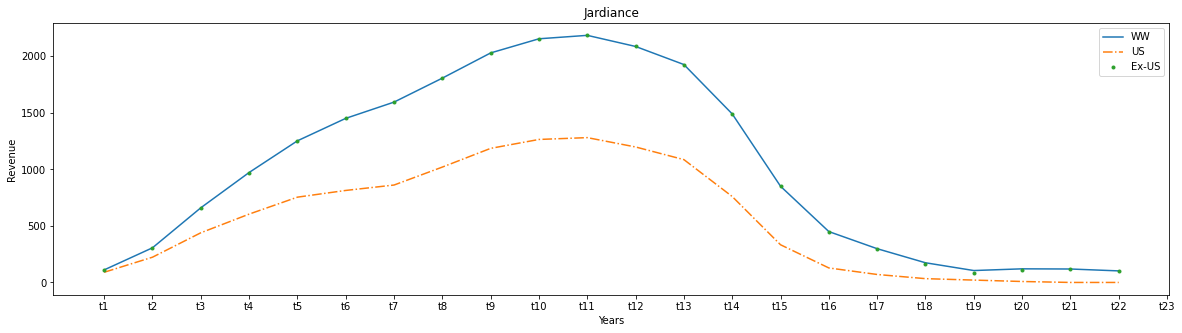

Biktarvy


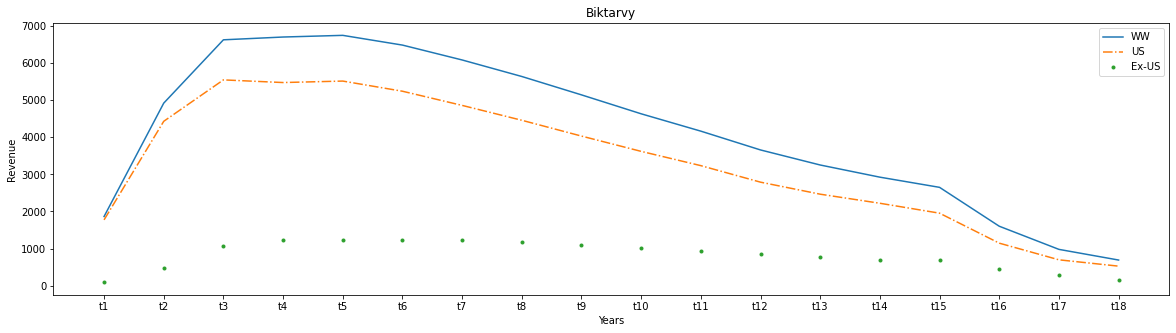

Tagrisso


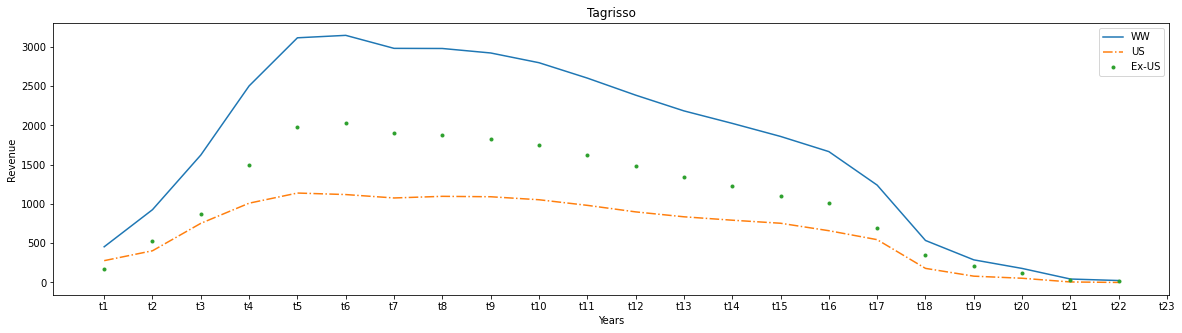

Darzalex


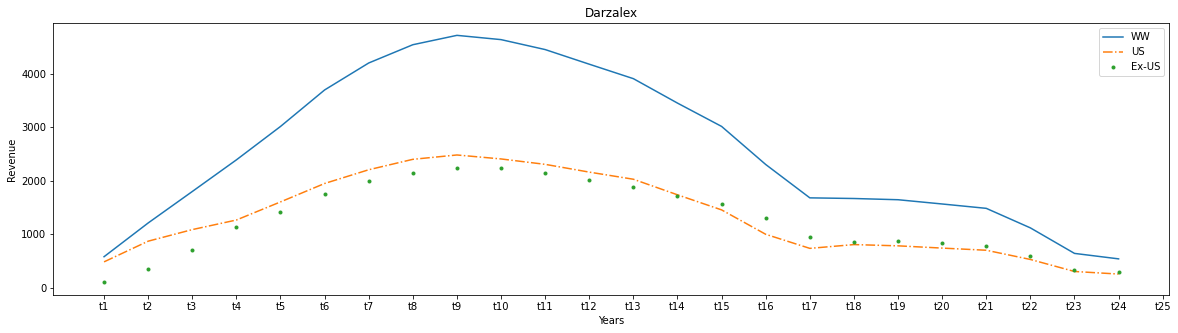

Northera


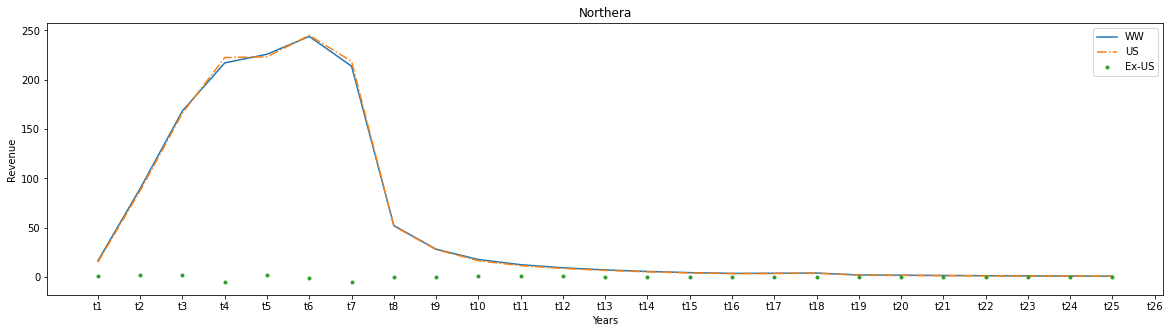

Myrbetriq


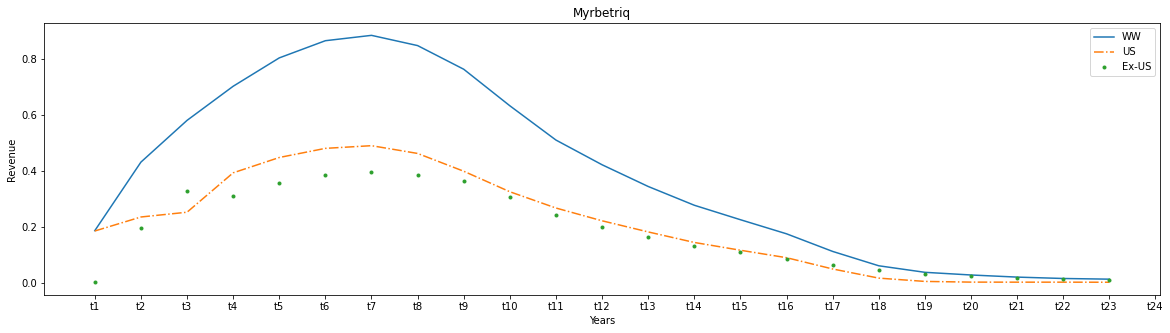

Adempas


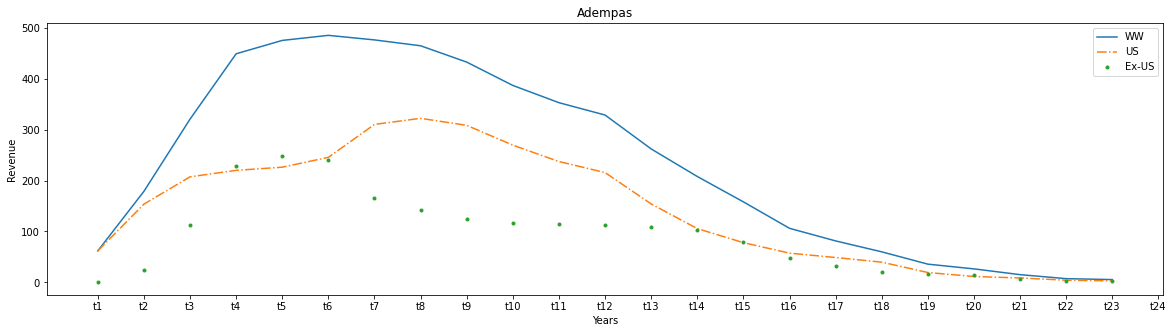

Perjeta


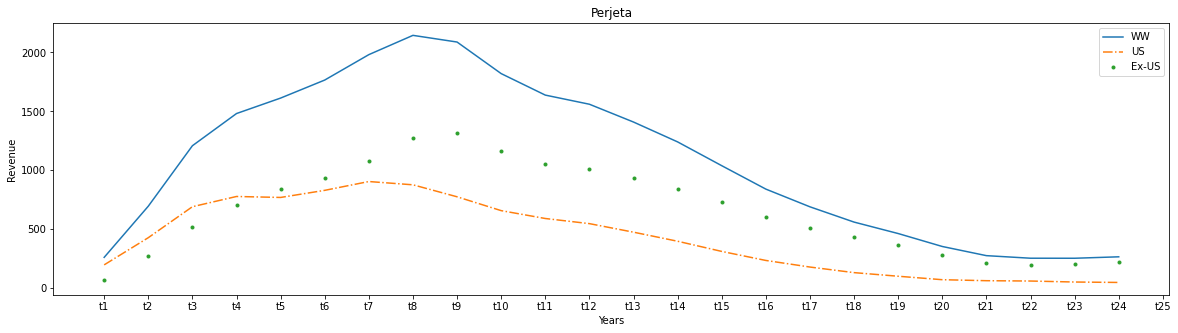

Esbriet


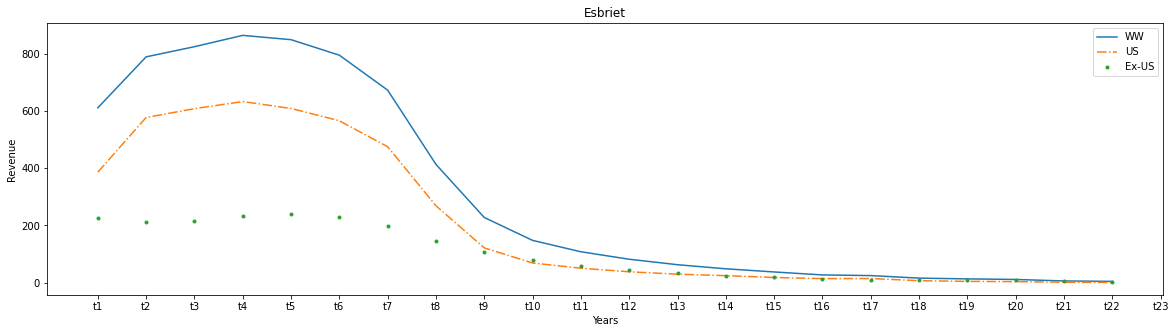

Verzenio


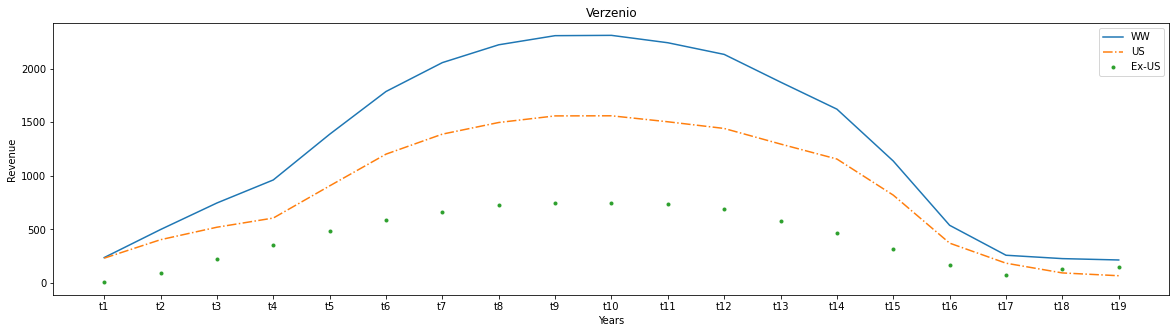

Cabometyx/Cometriq


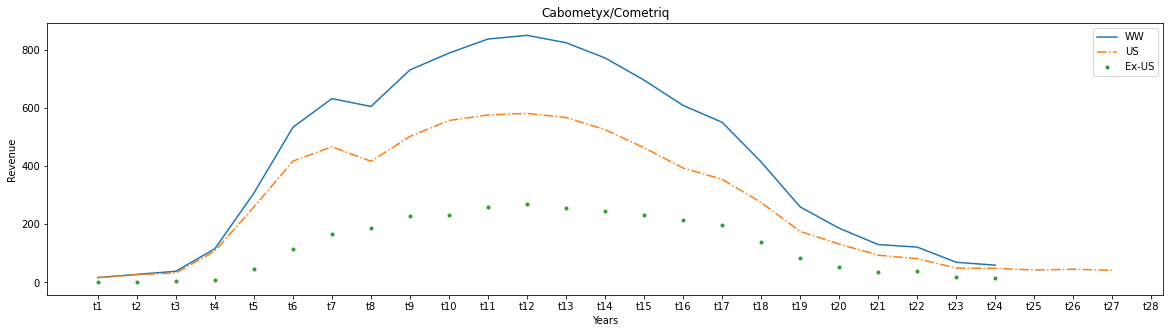

Ingrezza


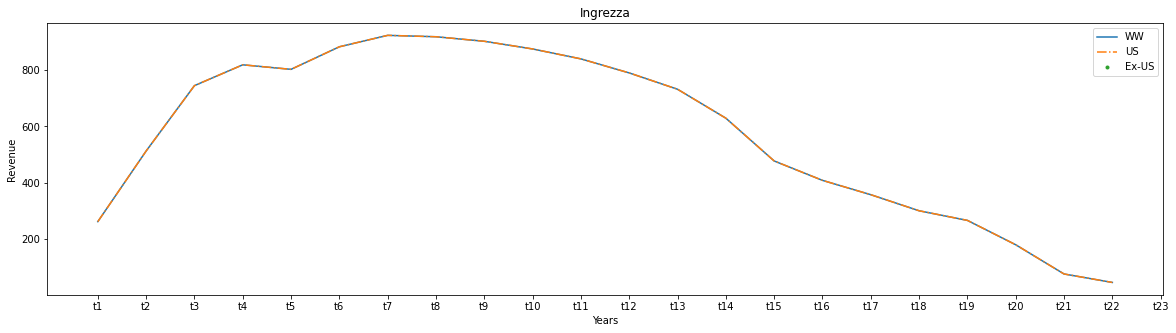

Incruse


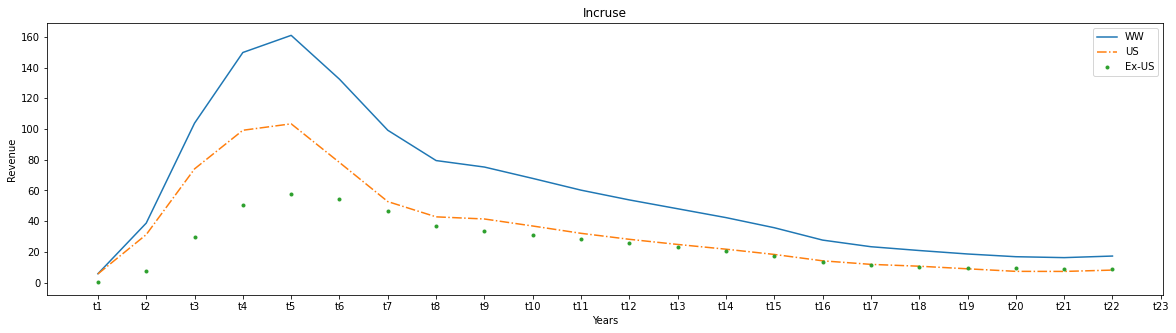

Lenvima


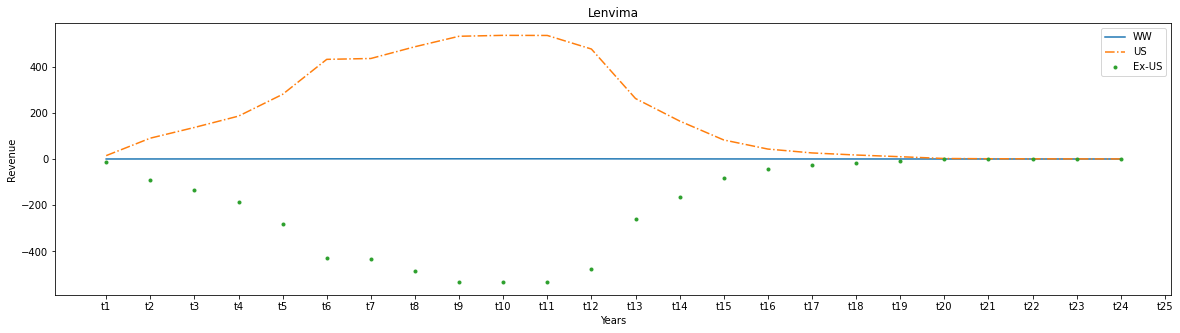

Invokana


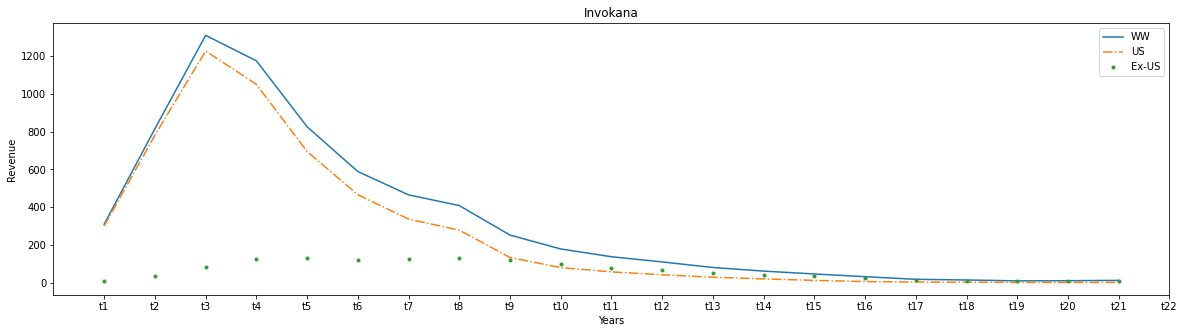

Kyprolis


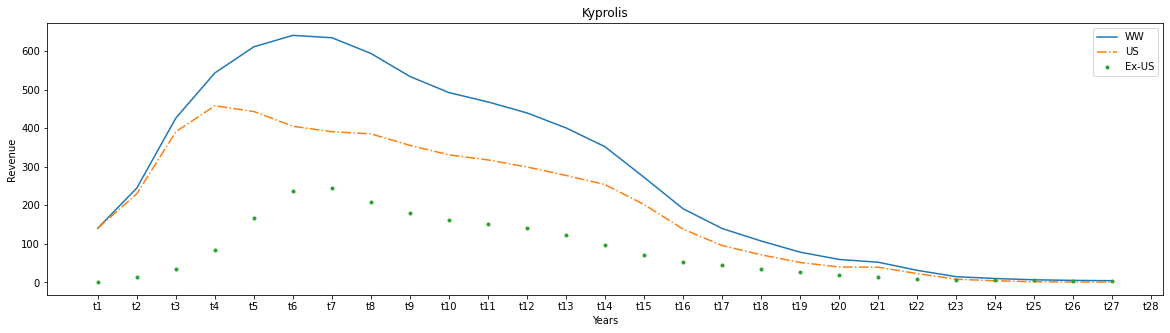

Ofev


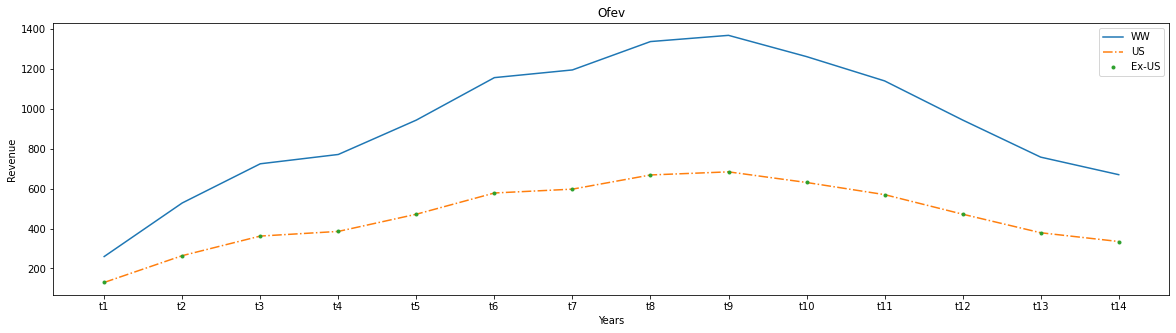

Inlyta


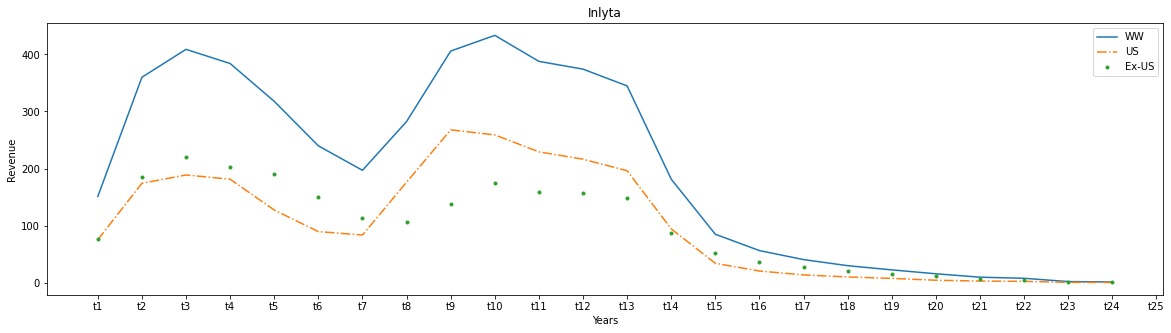

Simponi


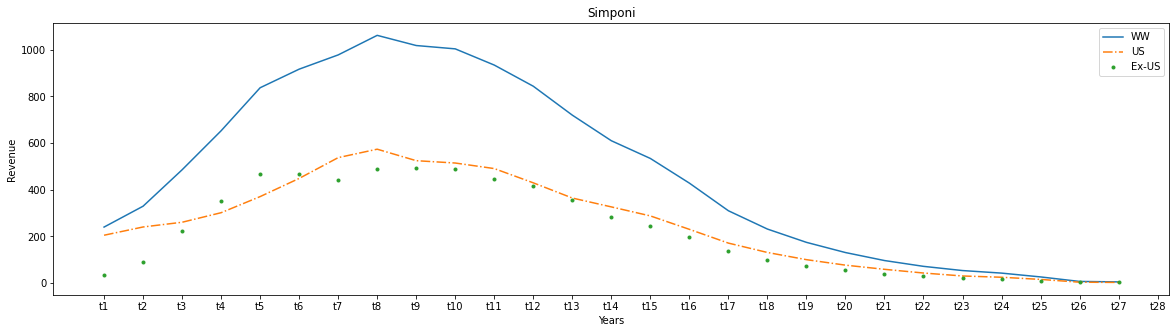

Opsumit


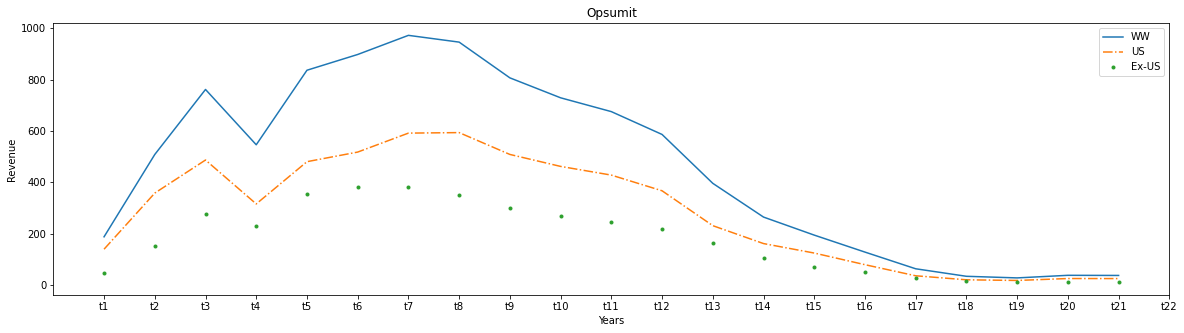

Rexulti


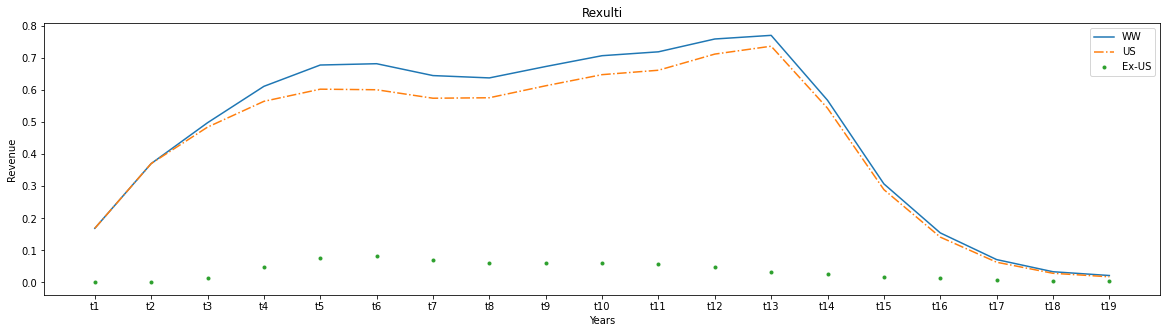

NPlate


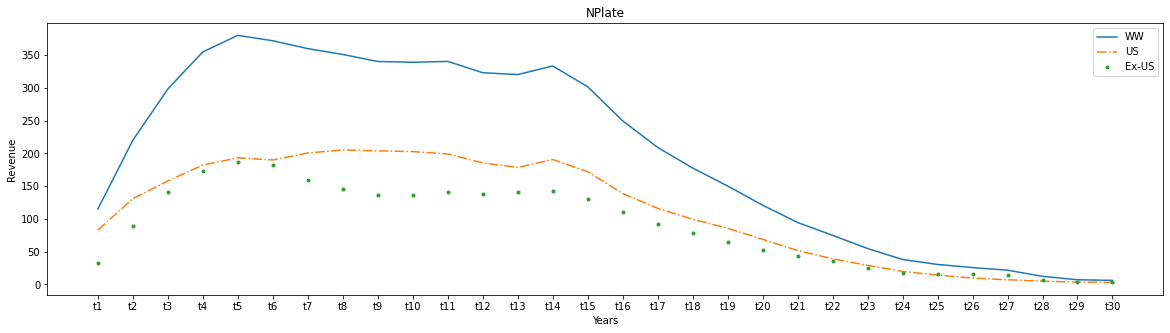

Vraylar


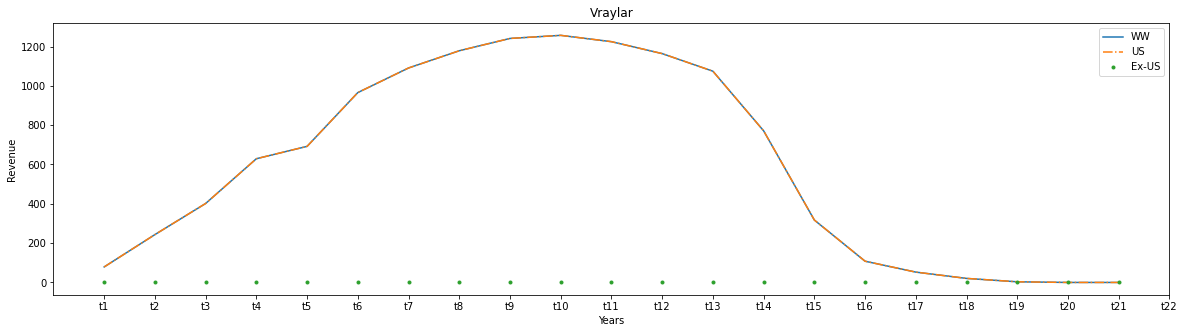

Xeljanz


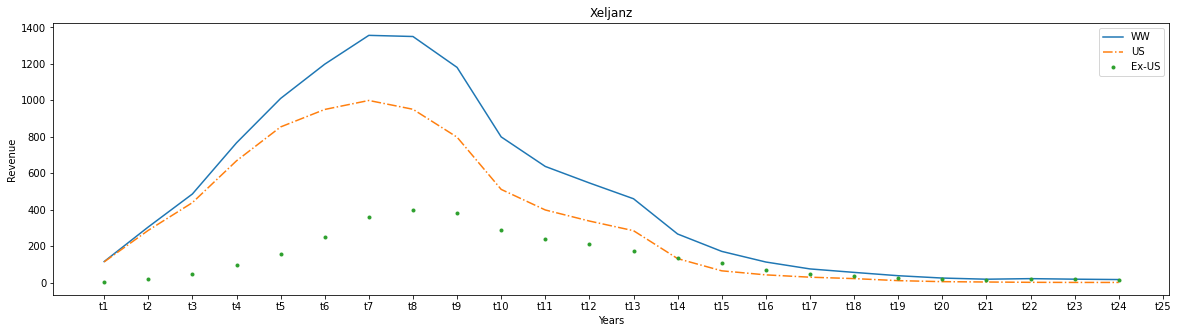

Eylea


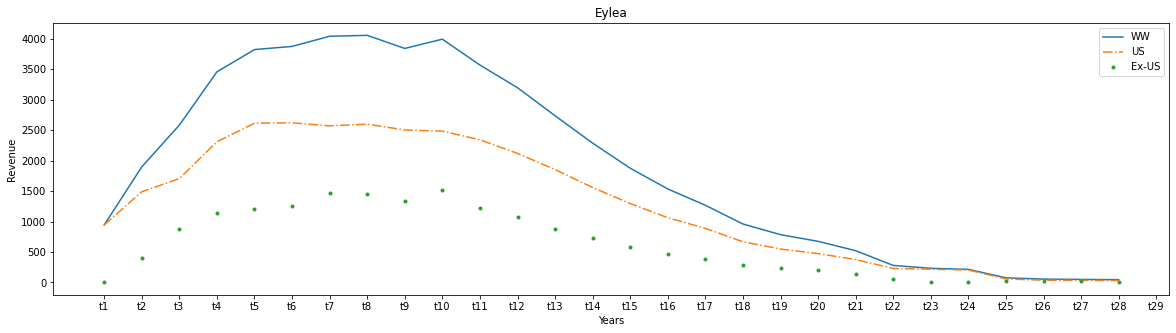

Invega Sustenna/Xeplion/Trinza


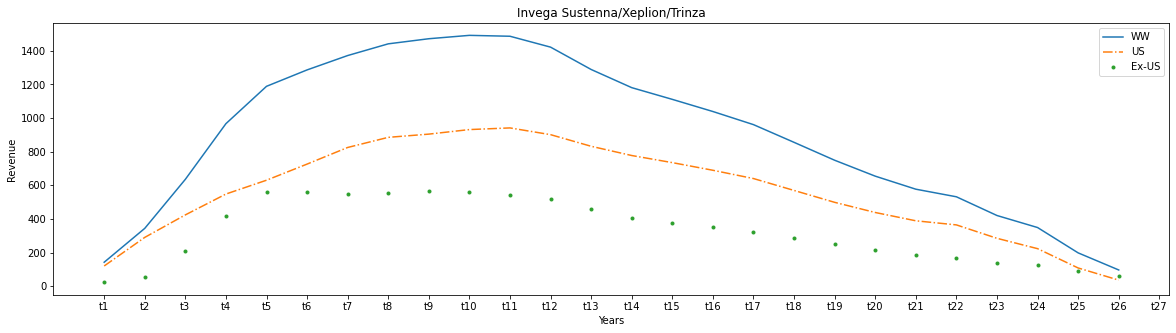

Mavyret


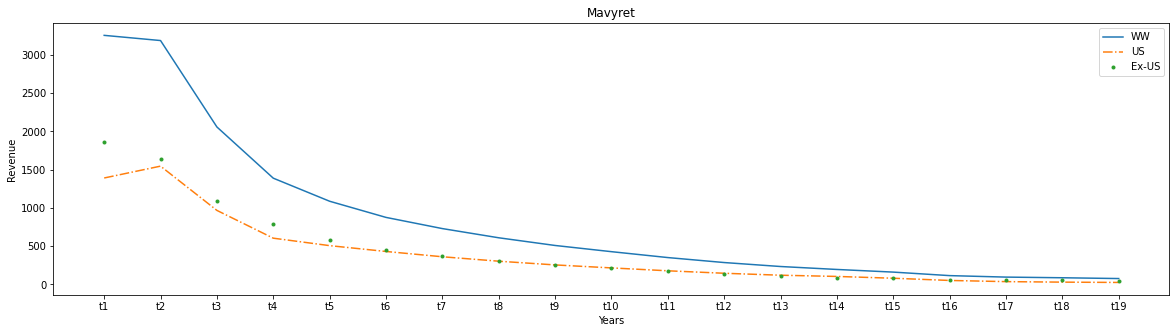

Cosentyx


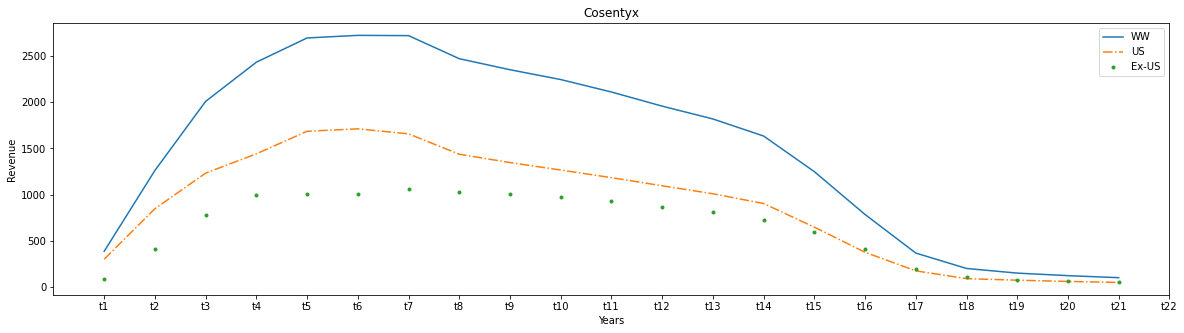

Nuplazid


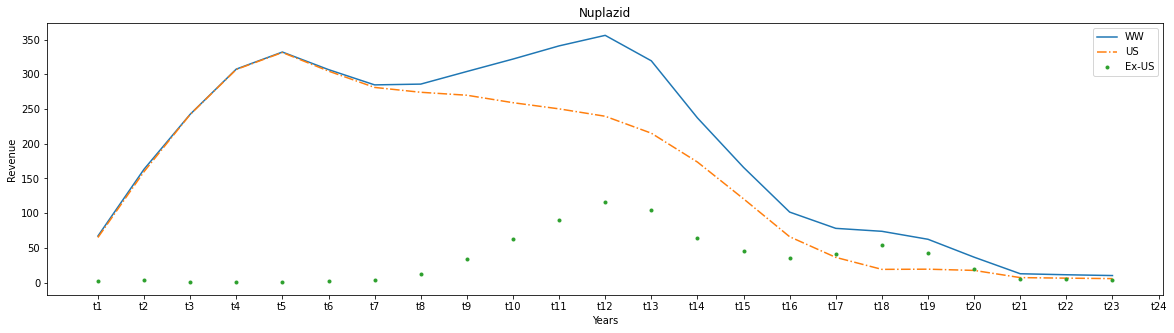

Gattex


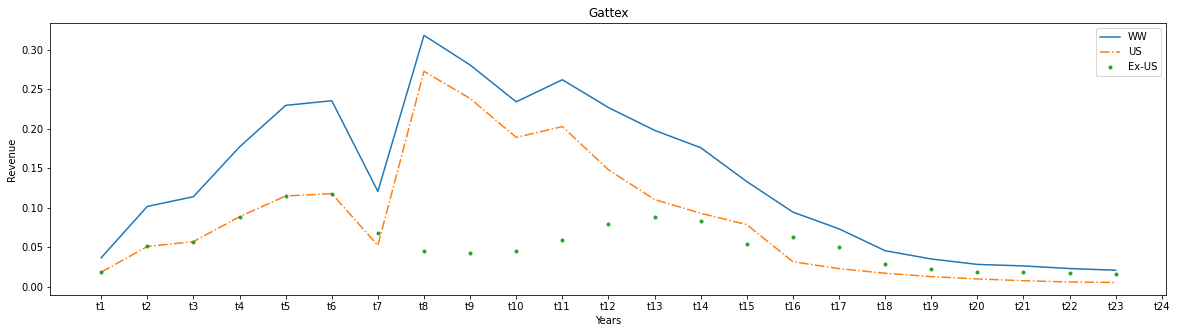

Eliquis


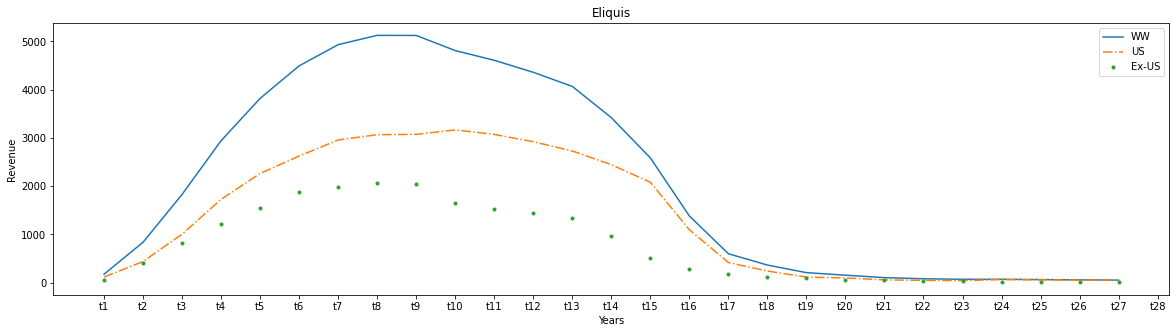

Gilenya


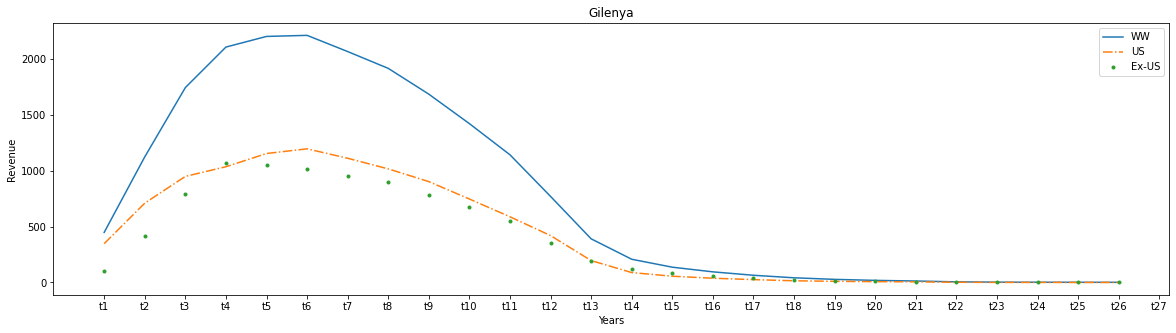

Trintellix/Brintellix


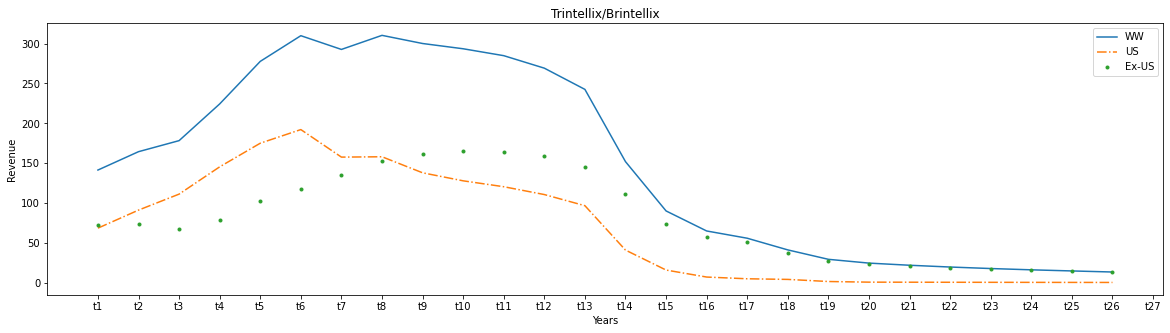

Opdivo


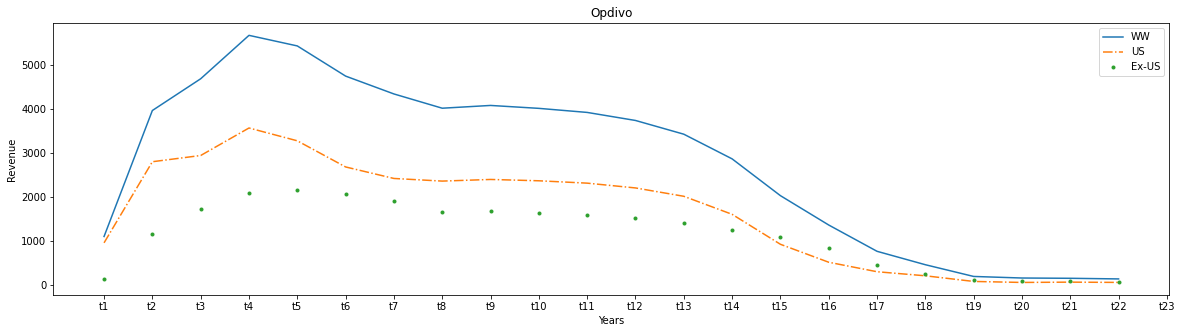

Pomalyst/Imnovid


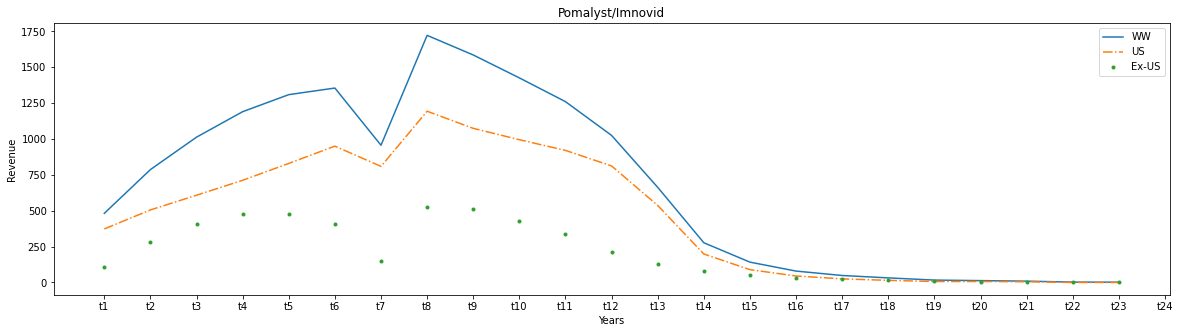

Lynparza


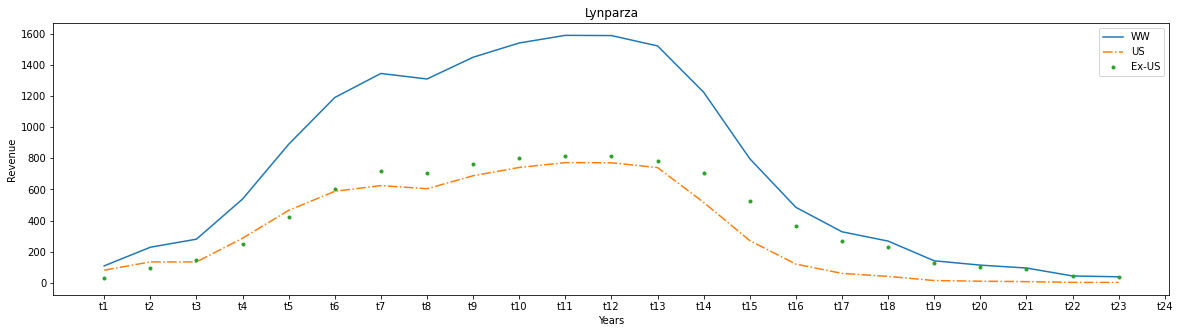

Aimovig


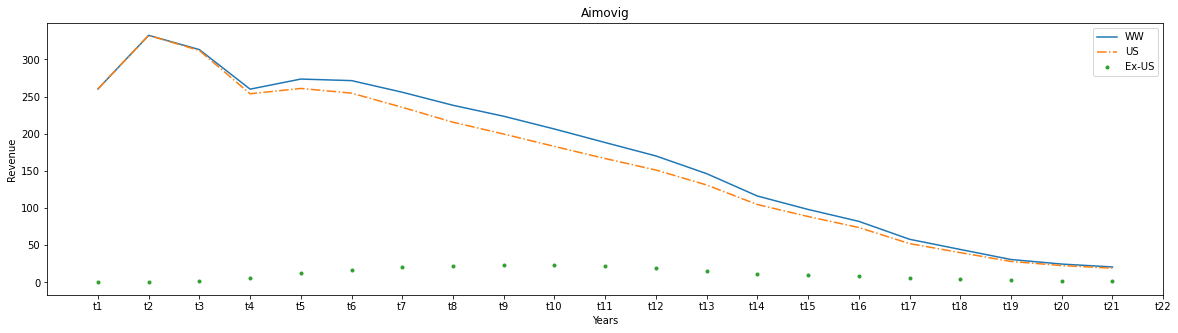

Multaq


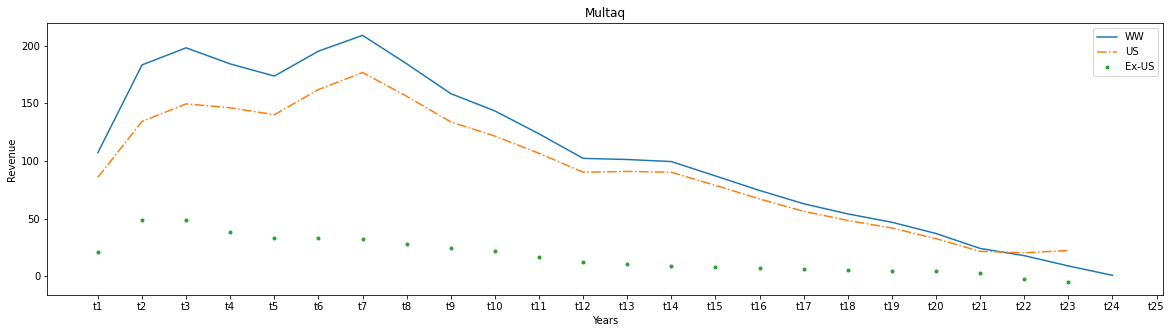

Entyvio


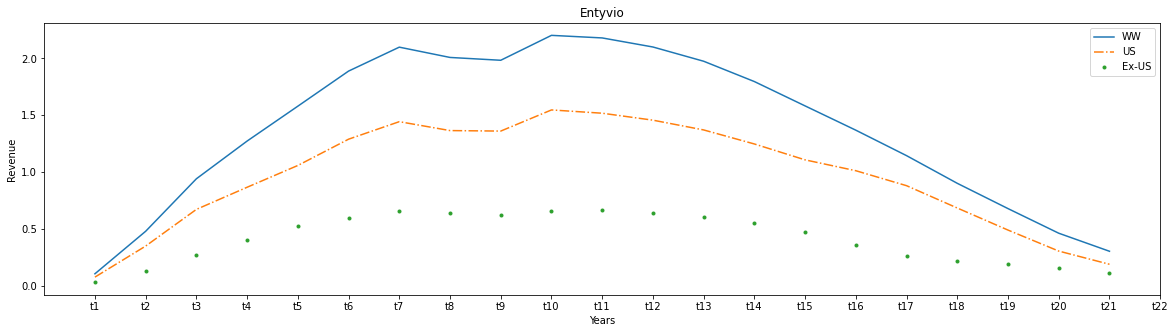

Genvoya


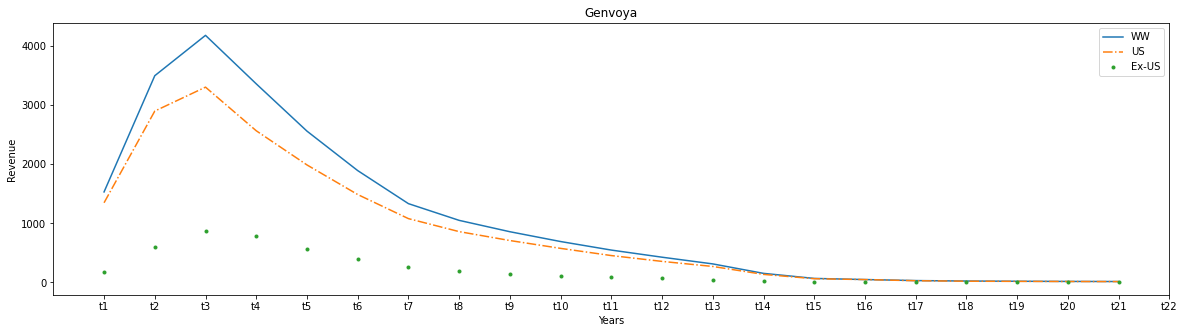

Trulicity


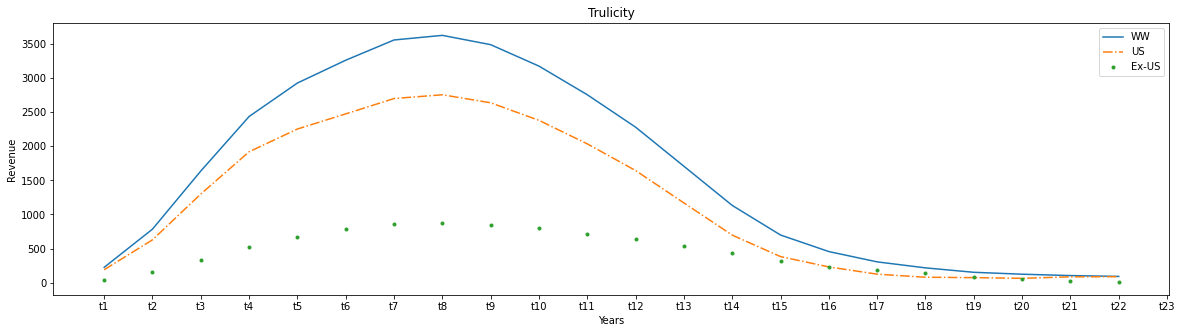

Victoza


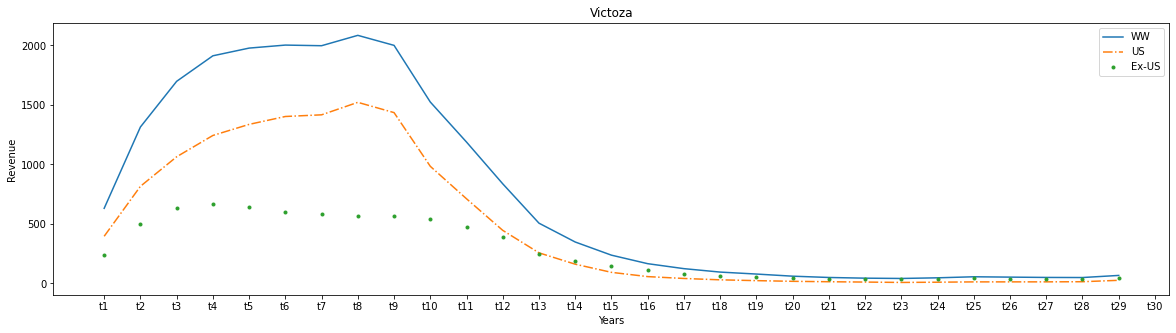

Promacta


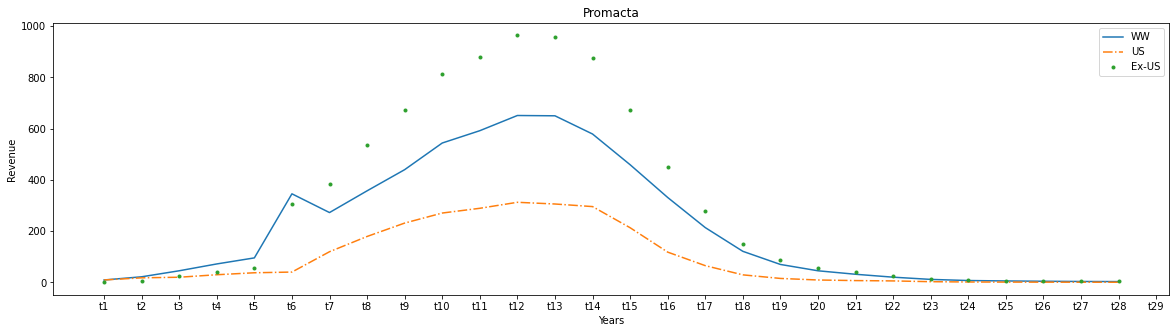

Toviaz


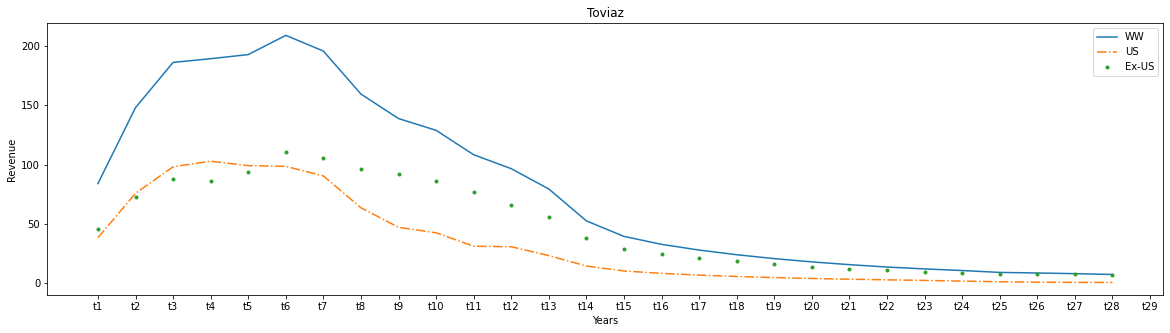

Breo Ellipta


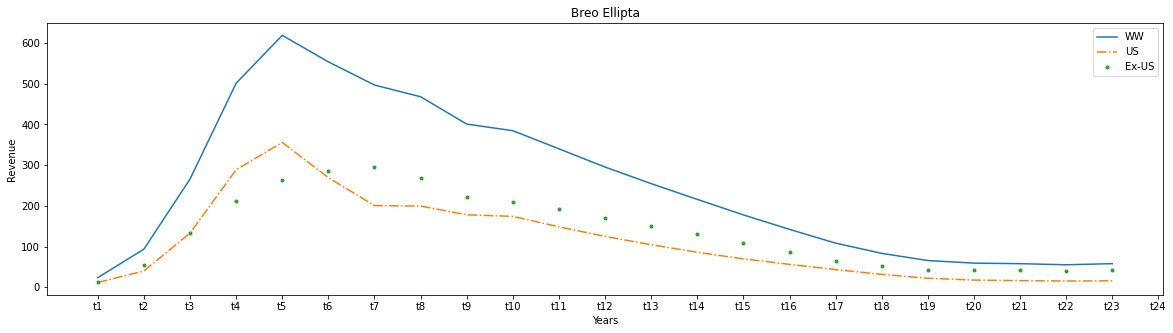

Imfinzi


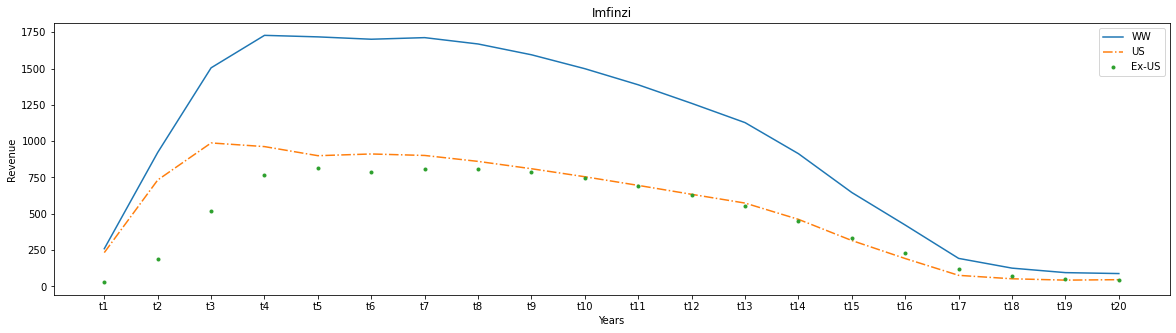

Tecfidera


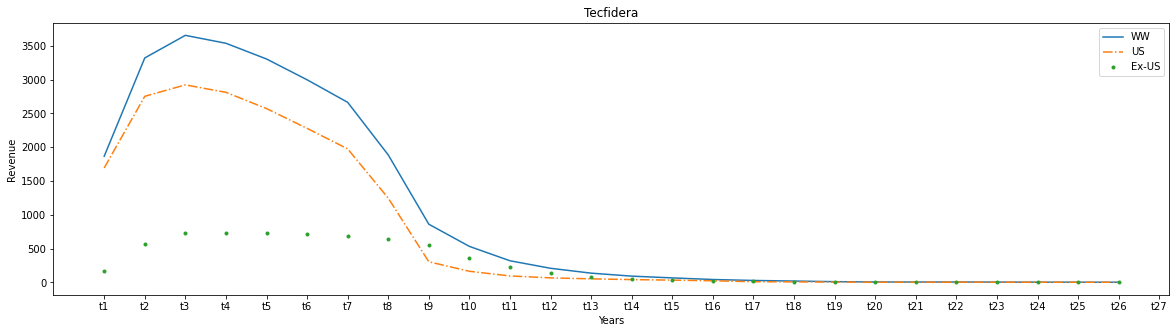

Calquence


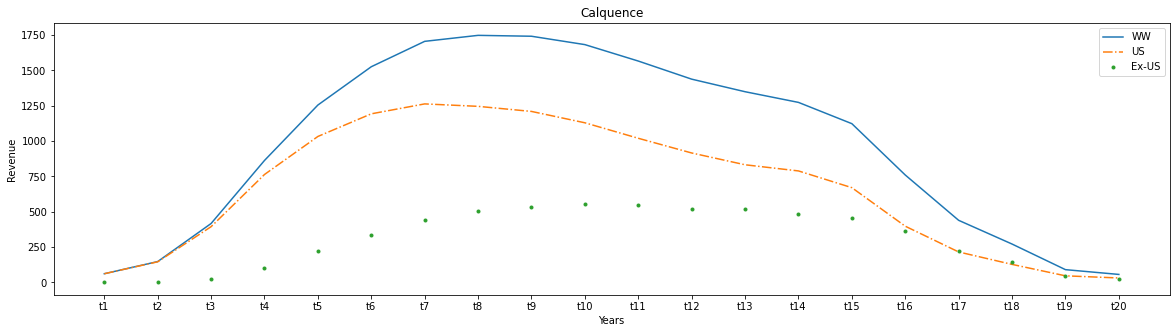

Yervoy


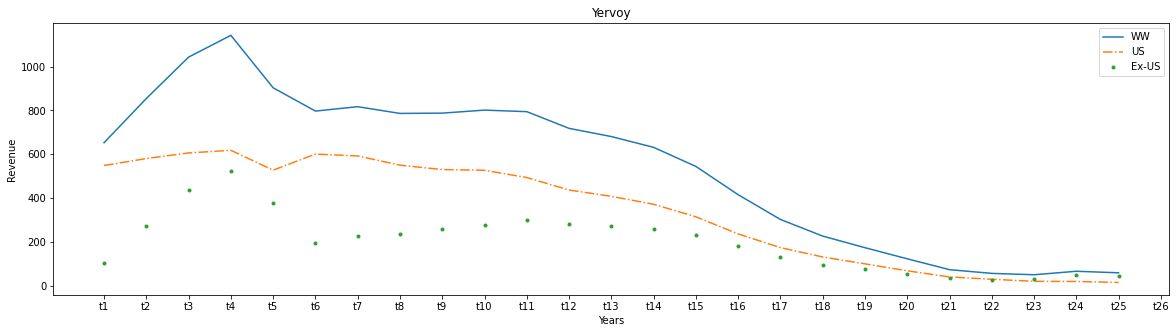

Skyrizi


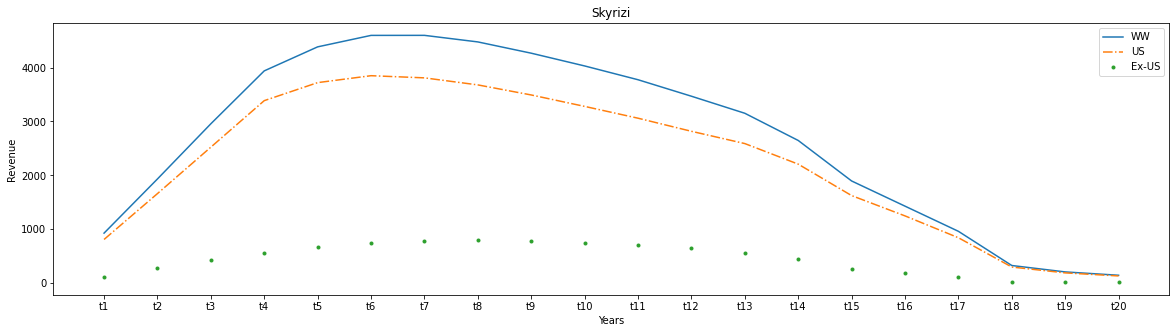

Erleada


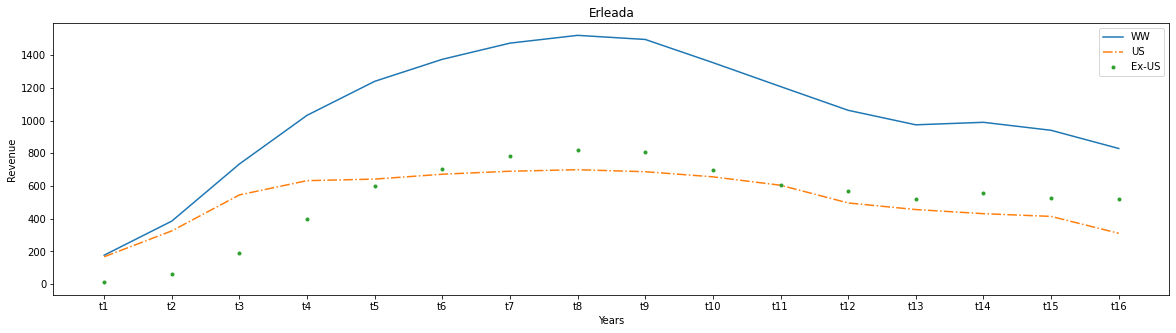

Praluent


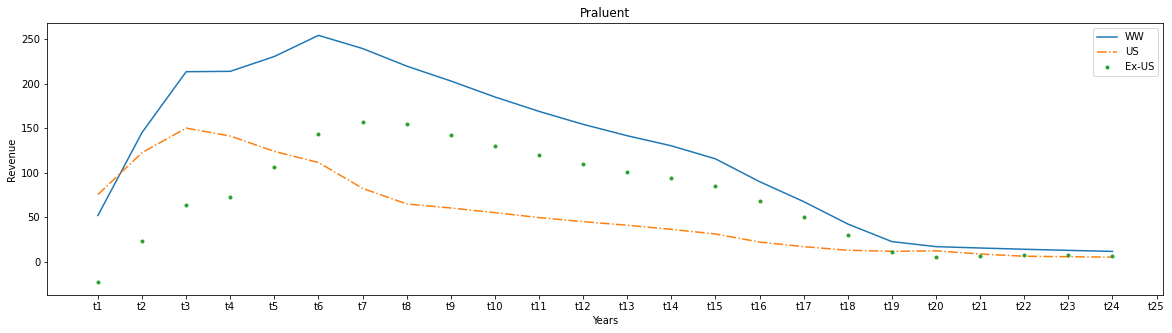

Ibrance


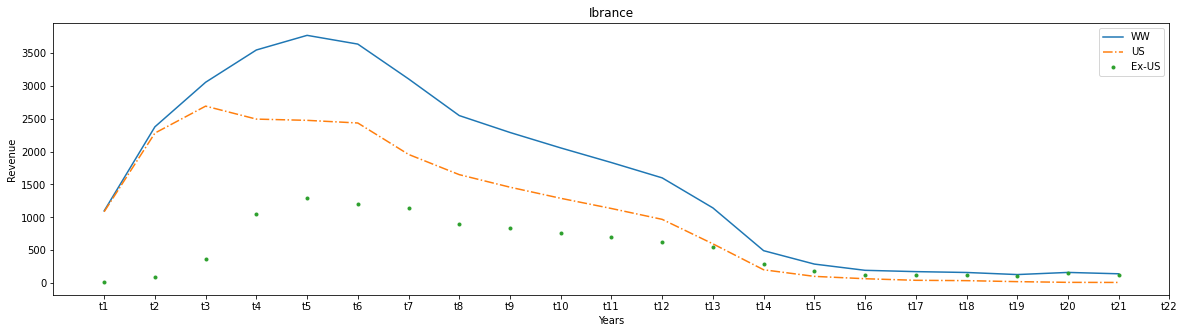

Ninlaro


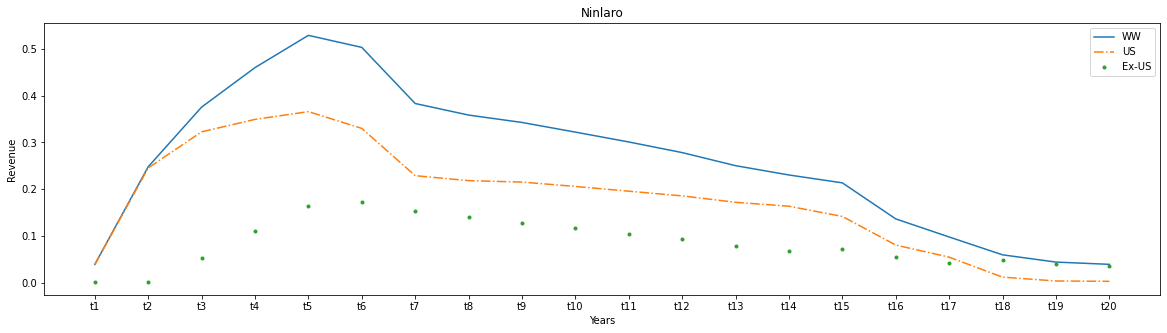

Fasenra


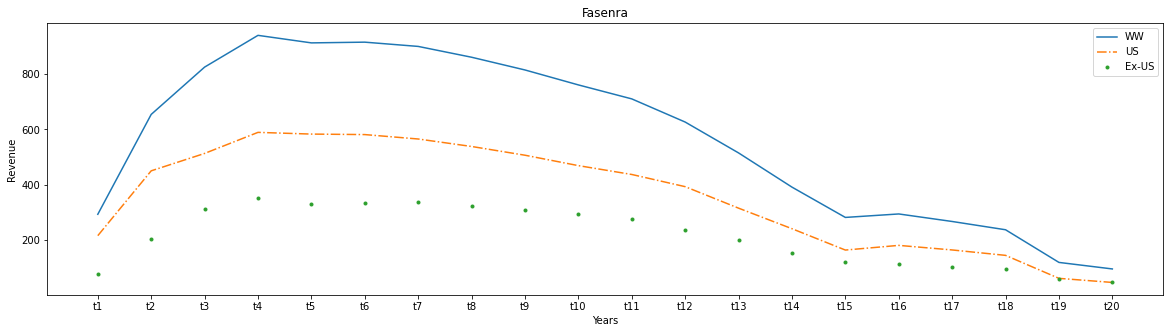

Tremfya


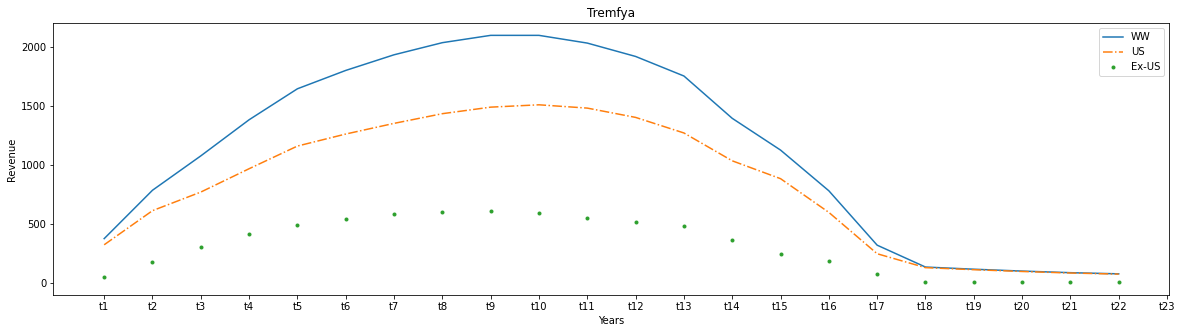

Dupixent


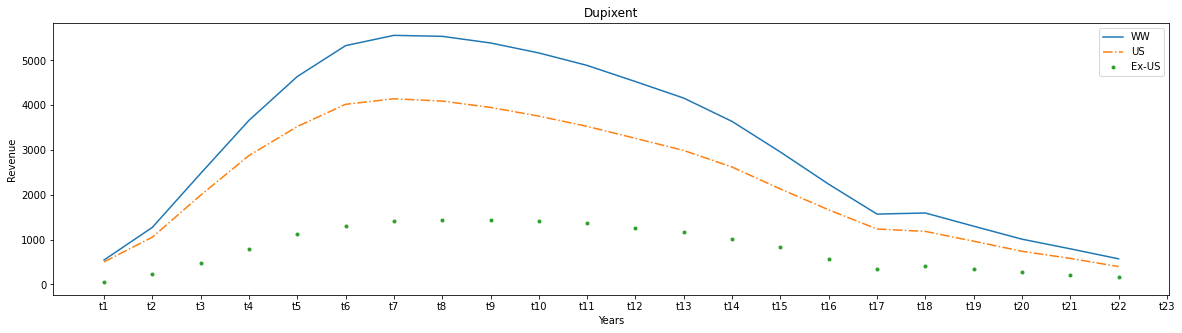

Ozempic (Rybelsus)


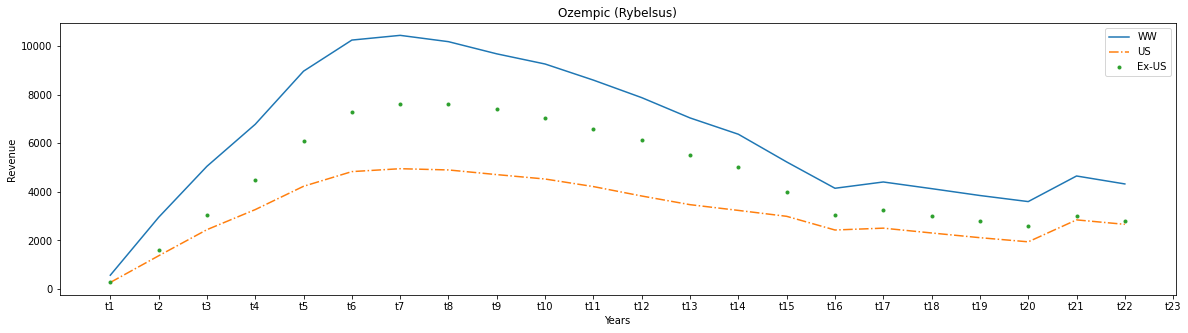

Actemra


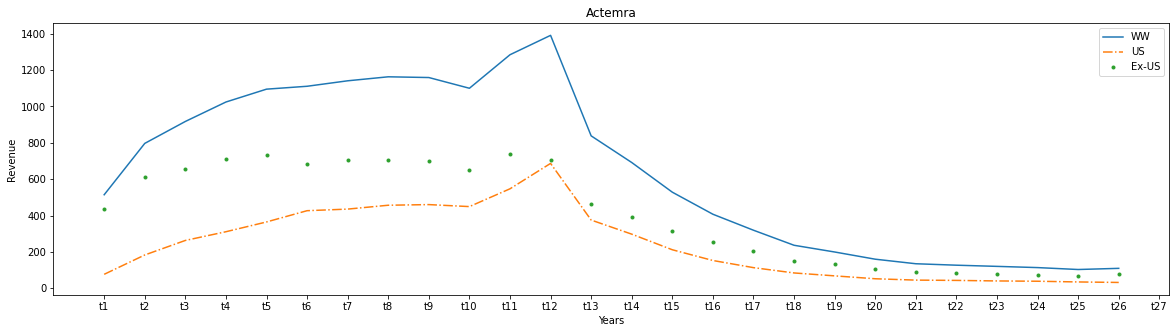

Aubagio


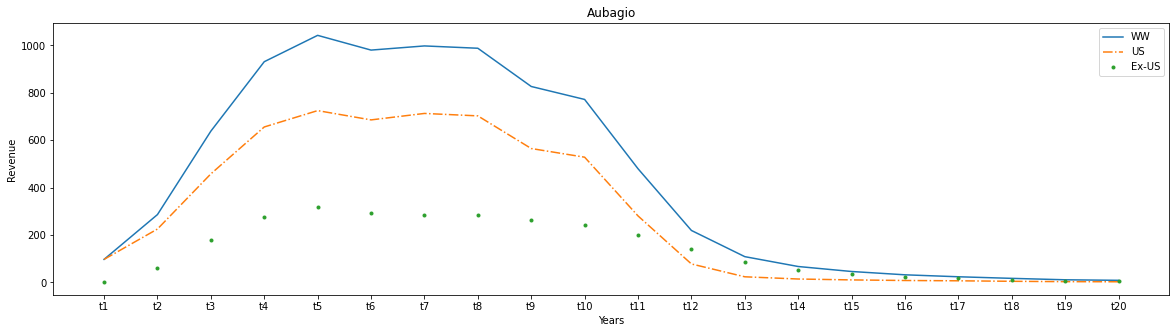

Trikafta


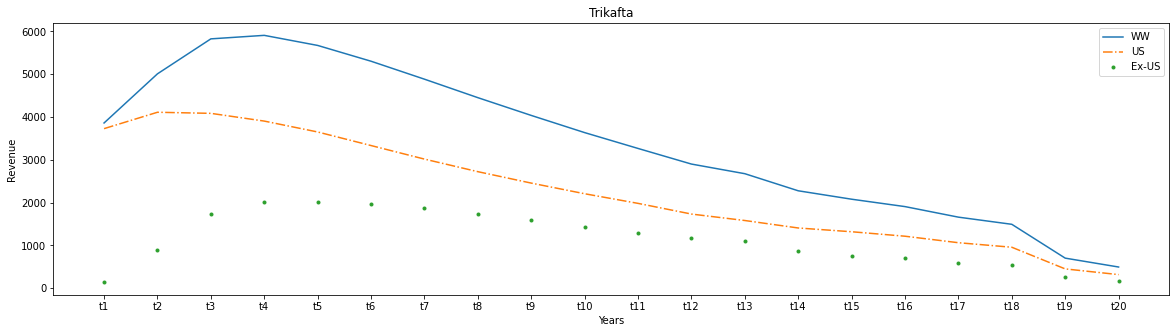

Pradaxa


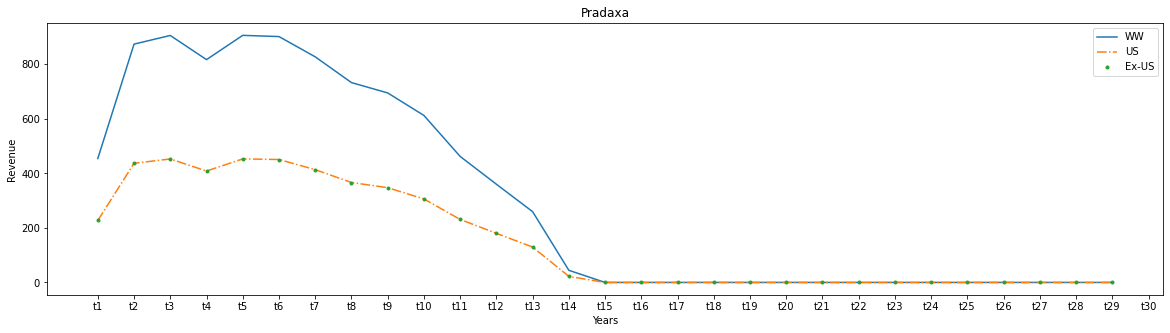

Ocrevus


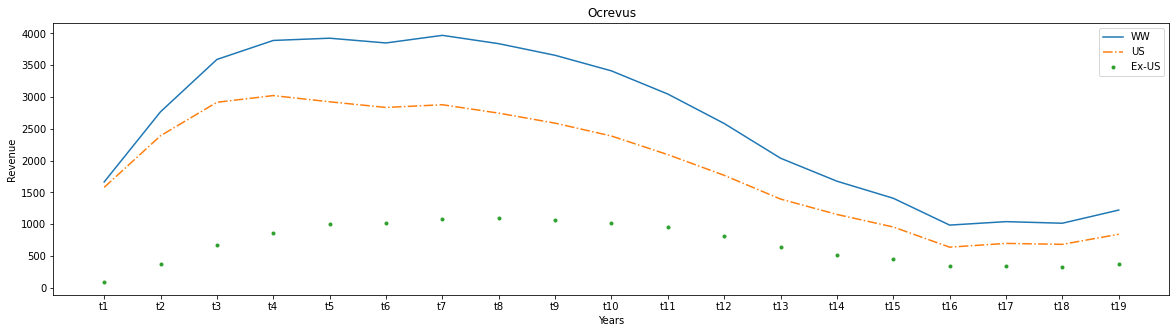

Xarelto


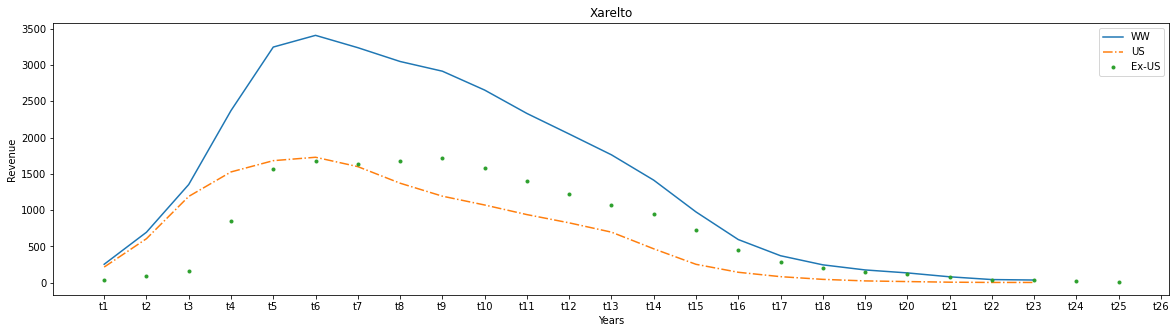

Kadcyla


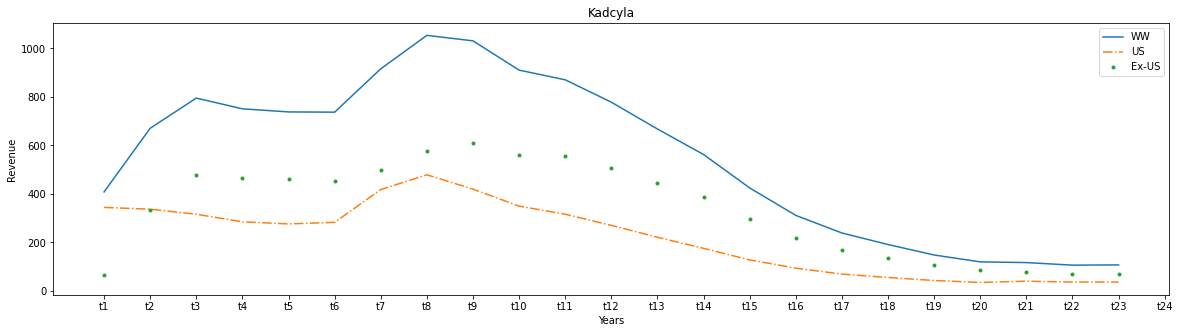

Stelara


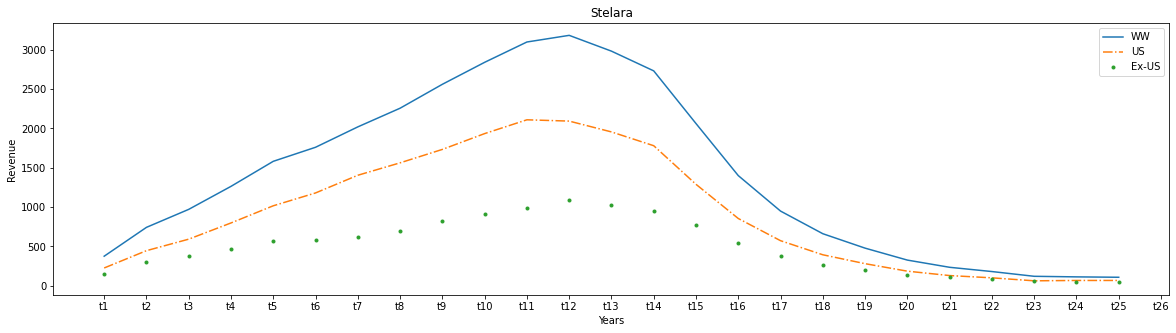

Linzess


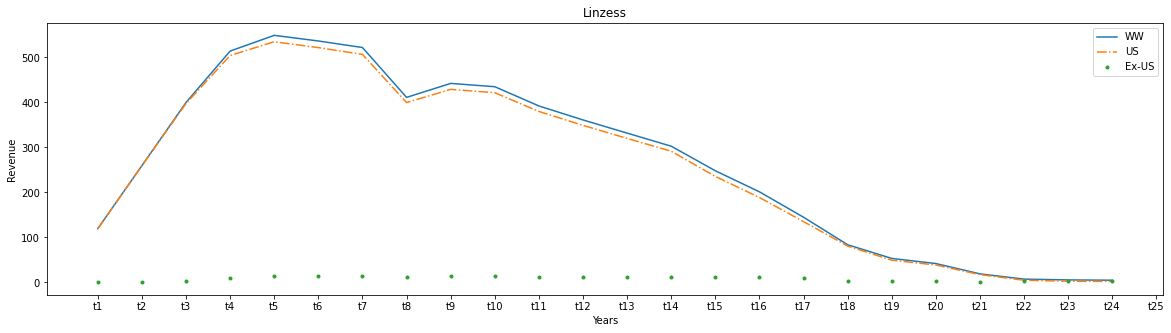

Austedo


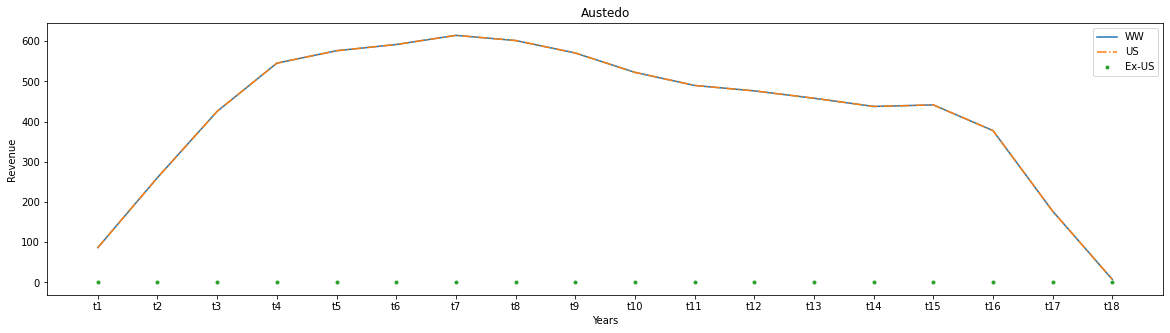

Prolia/Xgeva


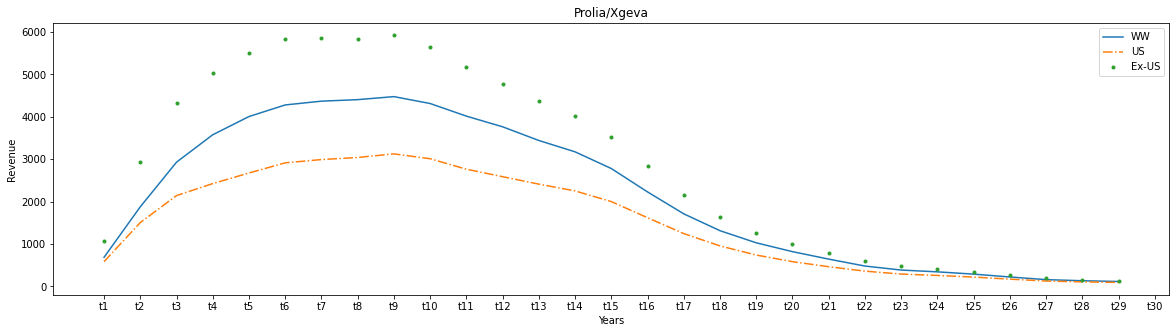

Cimzia


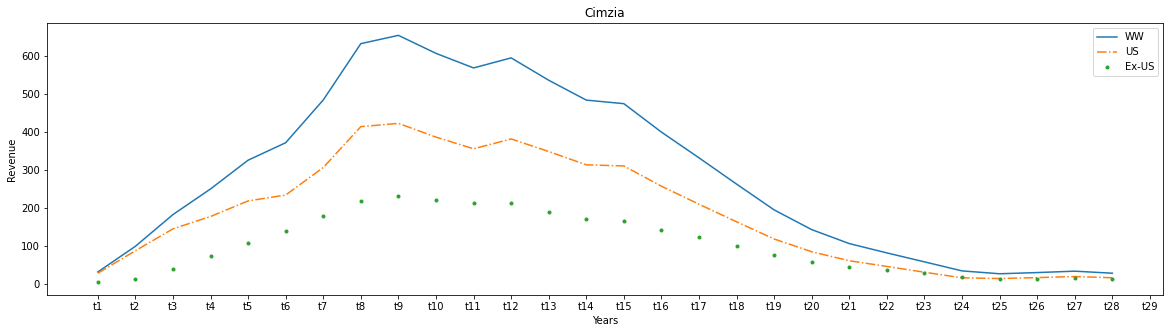

Tecentriq


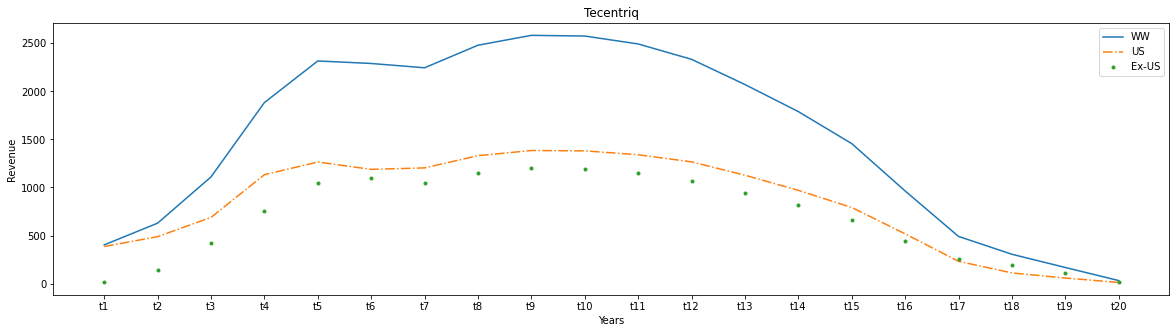

Nucala


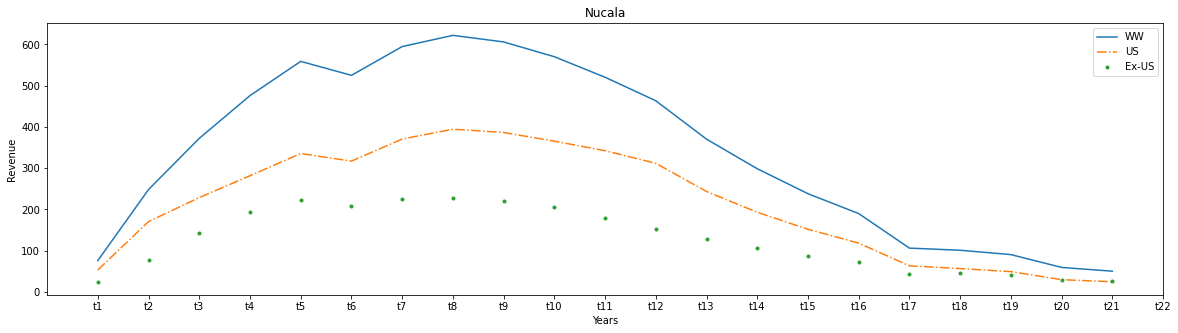

Jakafi


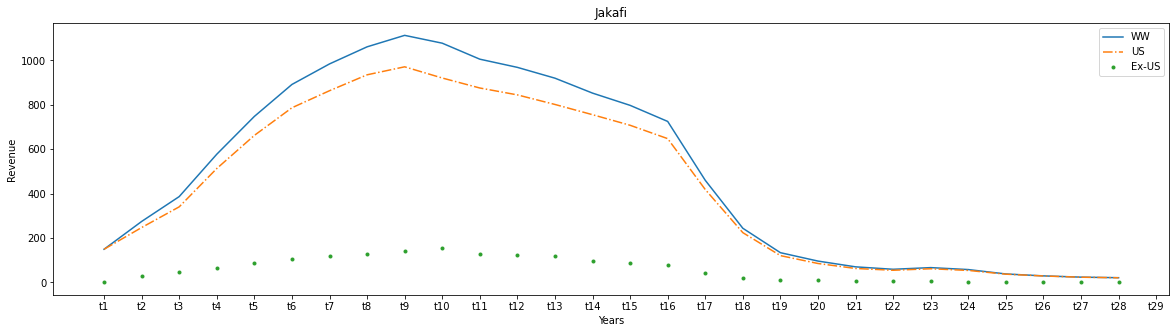

Brilinta


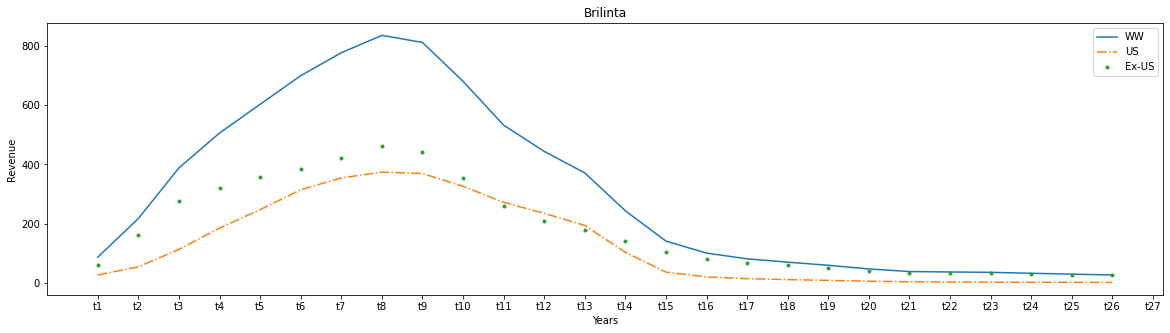

Imbruvica


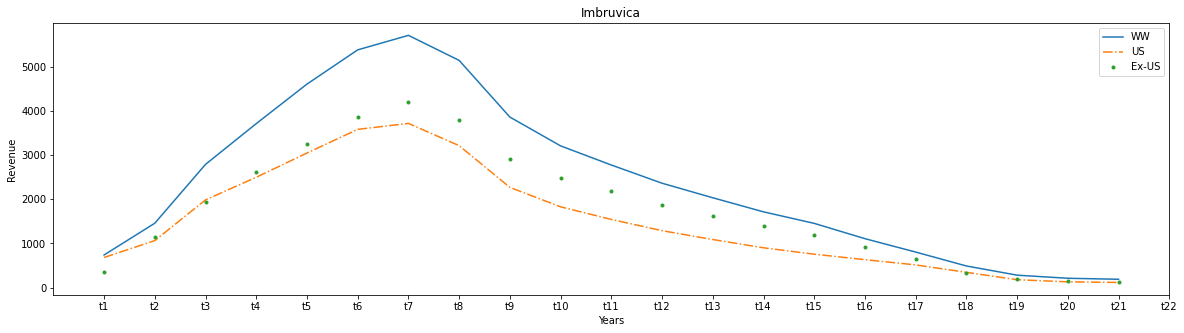

Otezla


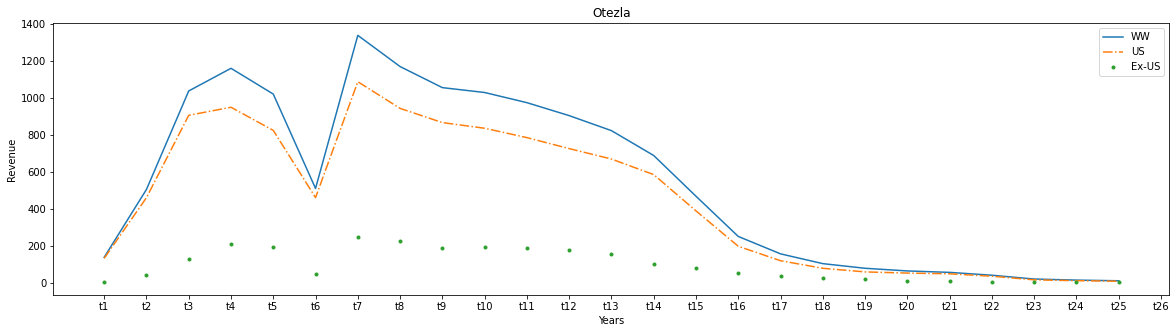

Uptravi


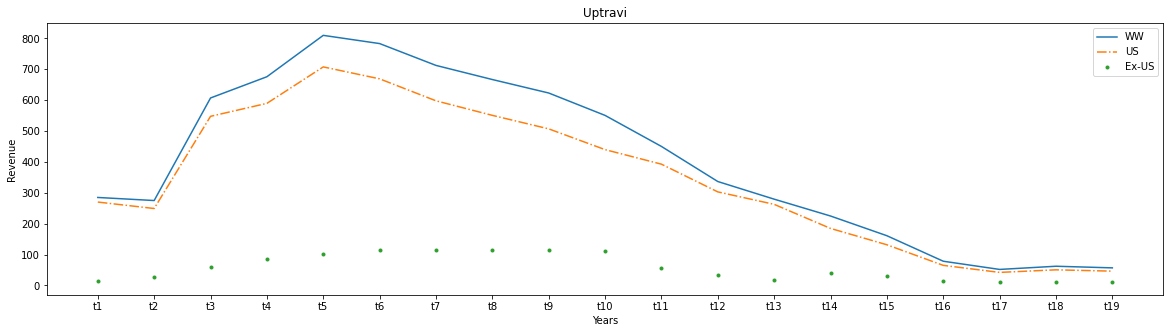

Keytruda


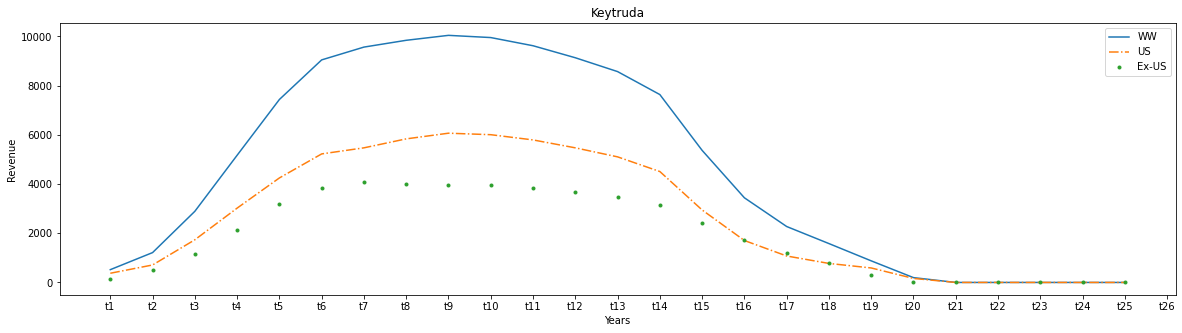

Entresto


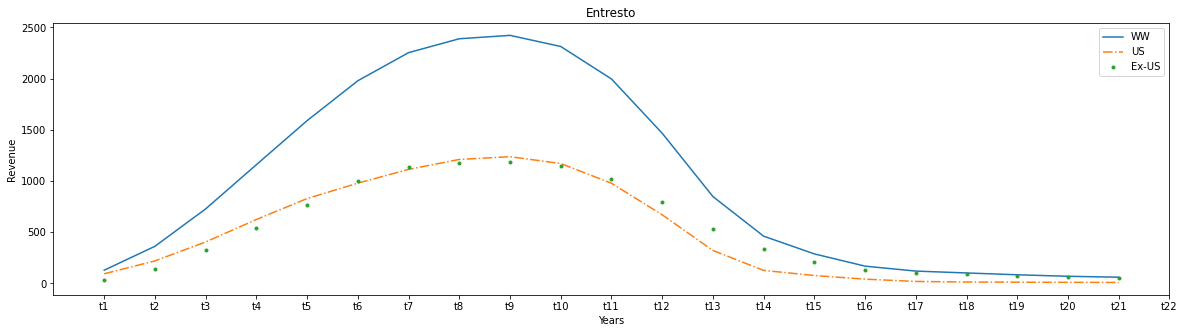

Vyndaqel/Vyndamax


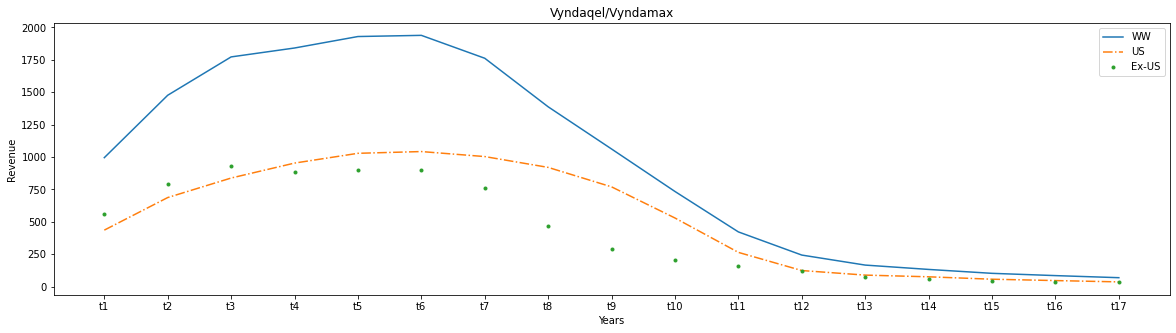

Toujeo


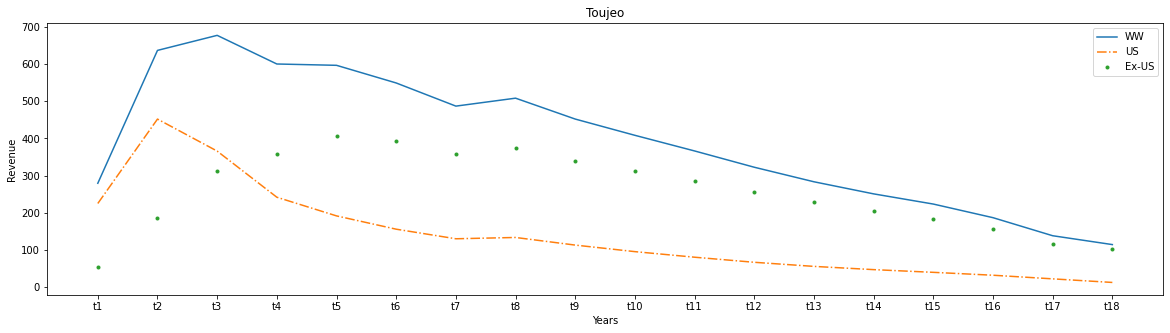

Repatha


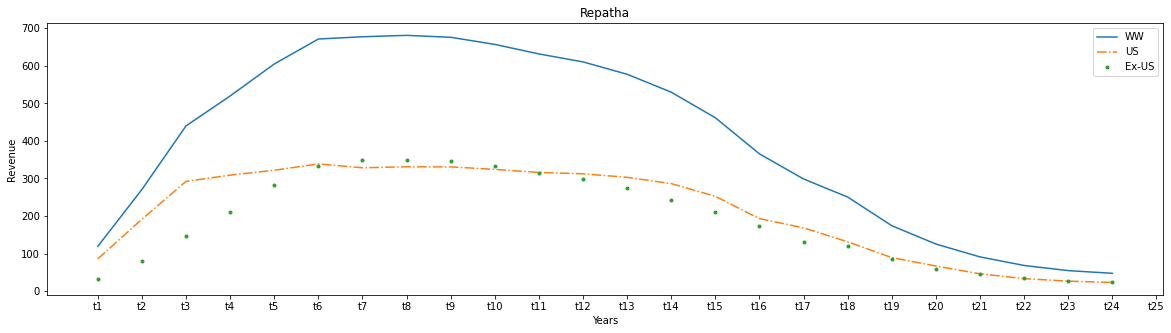

Vimpat


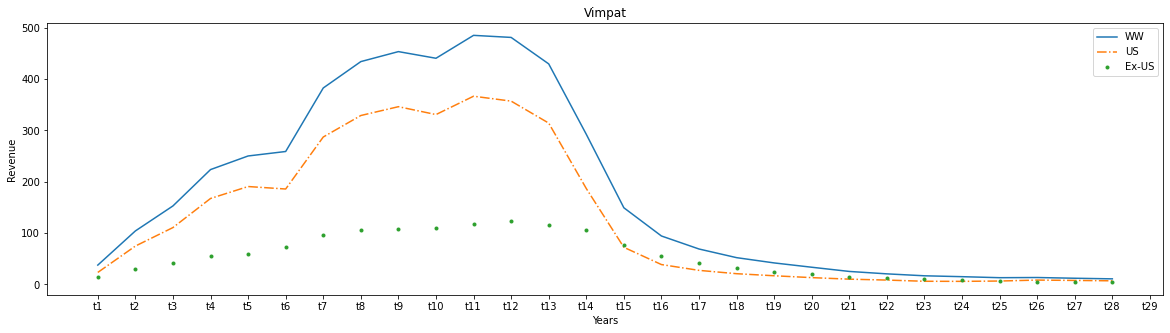

Tradjenta


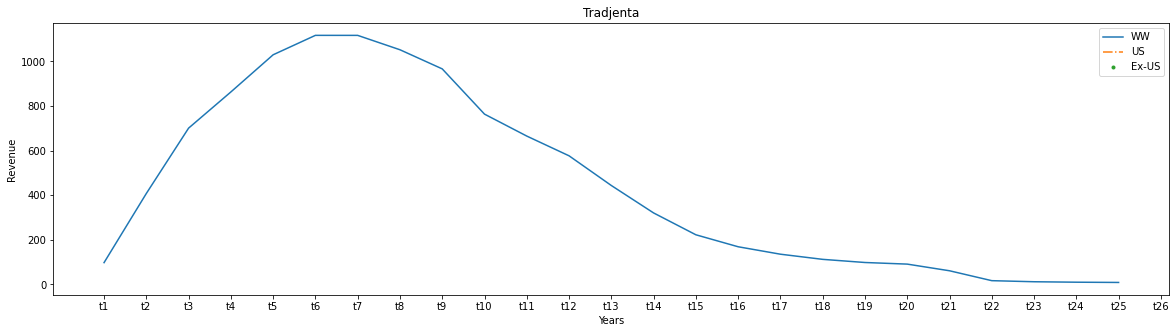

Tivicay


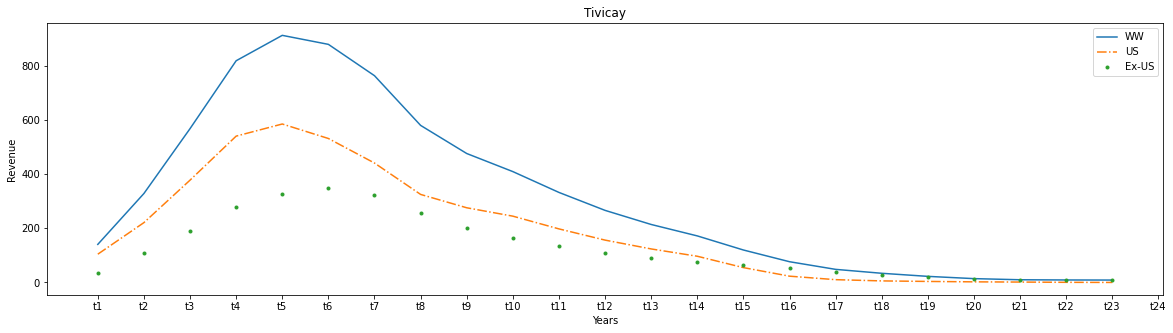

Venclexta


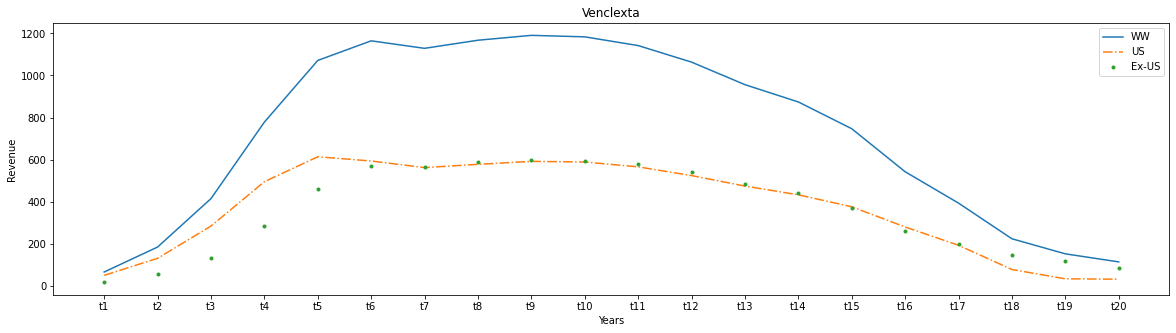

Farxiga


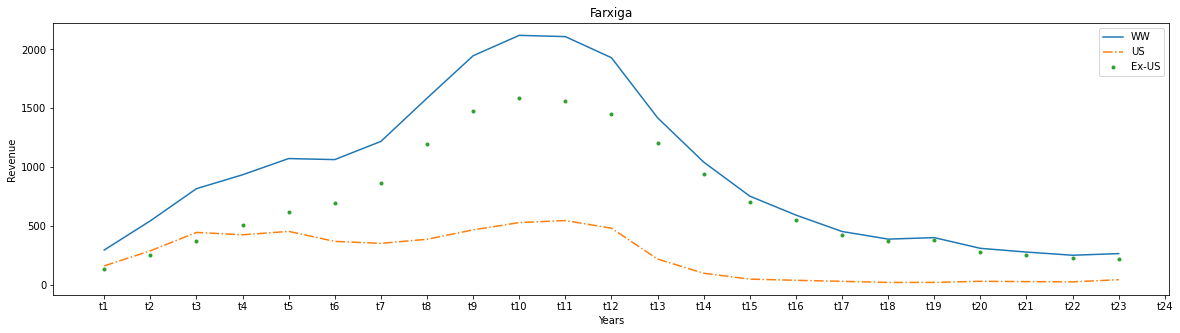

Tresiba


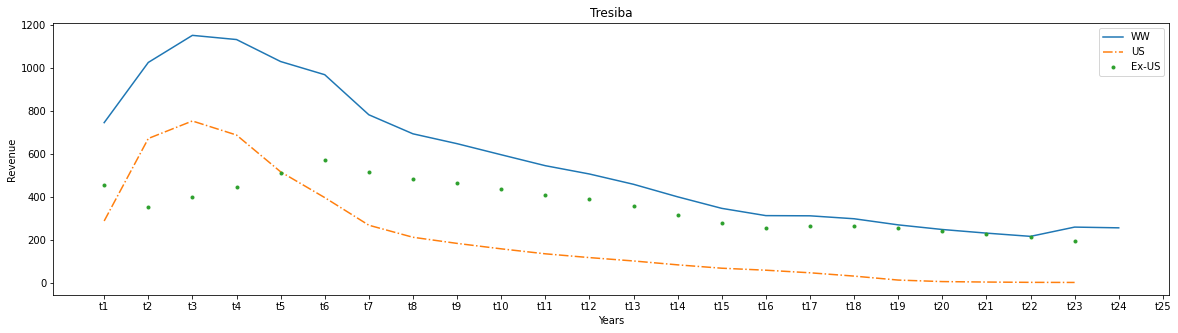

Latuda


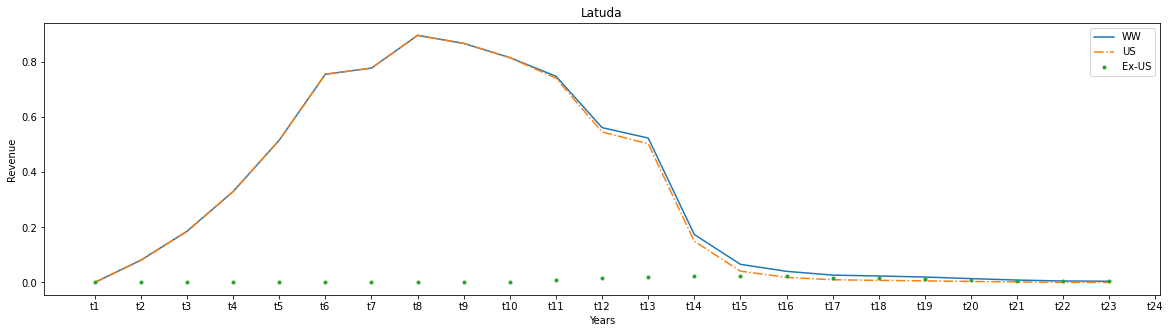

Xtandi


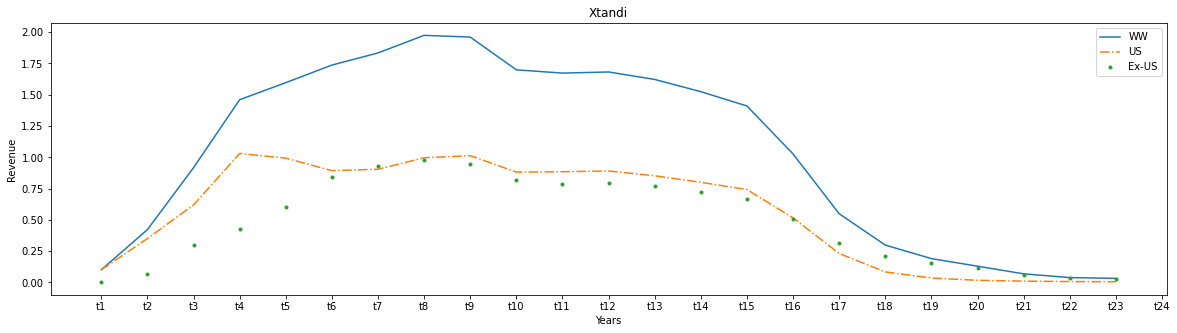

Taltz


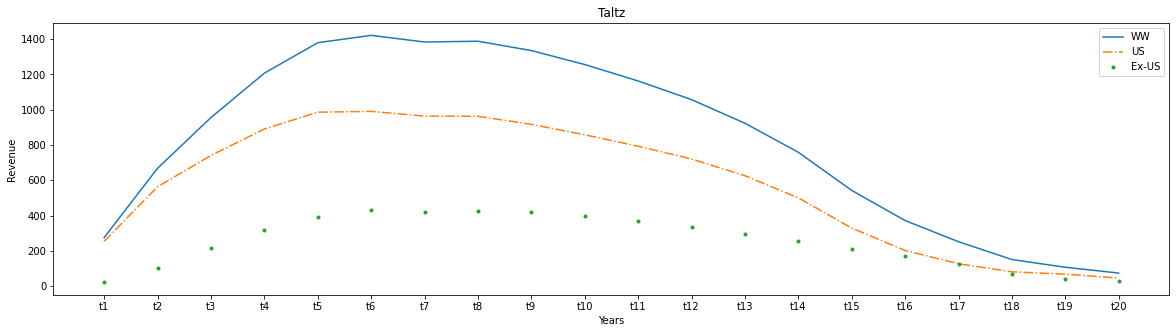

Rinvoq


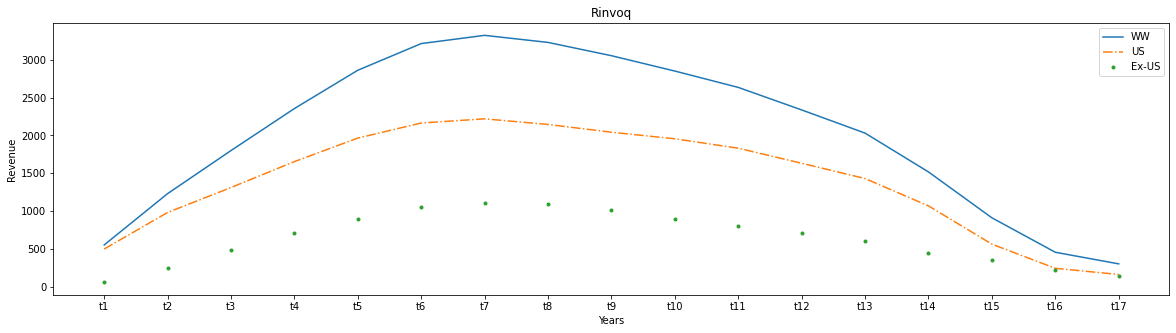

Xiidra


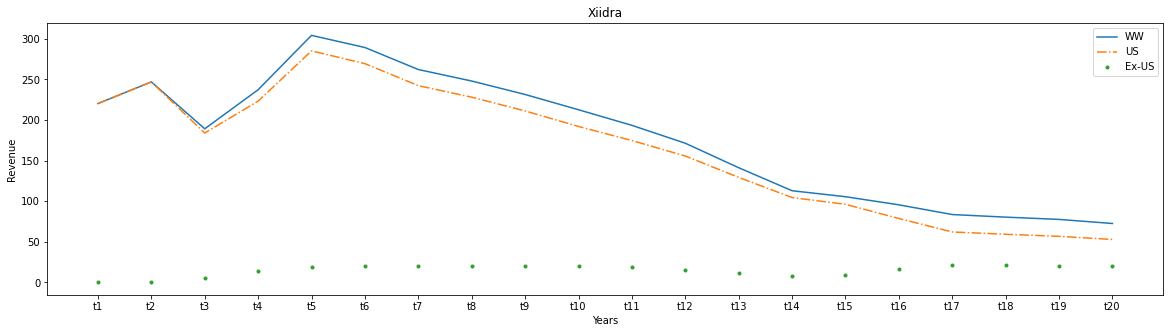

Aristada


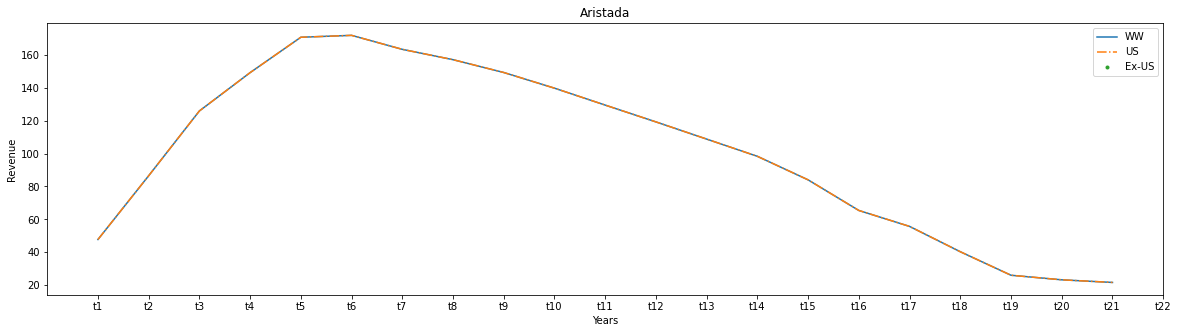

In [59]:
unique_drugs = list(set(df['Proper Name']))
year_cols = [f't{i}' for i in range(1, 31)]

for drug in unique_drugs:
    temp = df[df['Proper Name'] == drug]
    if len(temp) == 3:
        print(drug)
        x = year_cols
        y1 = temp[temp['Product Name'] == drug + ' WW'][year_cols].values[0]
        y2 = temp[temp['Product Name'] == drug + ' US'][year_cols].values[0]
        y3 = temp[temp['Product Name'] == drug + ' Ex-US'][year_cols].values[0]

        plt.plot(x, y1, label = 'WW')
        plt.plot(x, y2, '-.', label = 'US')
        plt.plot(x, y3, '.', label = 'Ex-US')

        plt.xlabel("Years")
        plt.ylabel("Revenue")
        plt.title(drug)
        plt.legend()
        plt.show()